In [103]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
data=pd.read_excel('combined.xlsx')
data

,出生年,性别,文化程度,婚姻状况,职业,是否吸烟,开始吸烟年龄,平均每周吸烟天数,一天吸烟支数,是否被动吸烟,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1976,1,4,2,4,1,16,7,20,2,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
1,1968,1,4,2,9,1,20,7,10,1,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
2,1976,1,4,1,12,1,20,7,10,2,...,0.000000,2.0,0.142857,0.142857,0.000000,1.000000,0.000000,2.000000,0.033333,0.285714
3,1962,1,4,2,12,1,23,7,20,2,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
4,1960,2,3,4,11,1,99,7,20,2,...,0.285714,2.0,0.571429,0.142857,0.142857,0.142857,0.571429,1.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1950,2,3,2,10,3,0,0,0,2,...,0.285714,3.0,0.142857,0.428571,3.000000,3.000000,0.428571,1.000000,0.066667,0.066667
7831,1968,1,3,2,4,3,0,0,0,1,...,0.285714,2.0,0.142857,0.285714,0.428571,0.285714,0.285714,0.714286,0.428571,0.285714
7832,1949,2,2,2,10,3,0,0,0,2,...,0.142857,2.0,0.142857,0.285714,0.000000,0.000000,0.285714,1.000000,0.000000,0.428571
7833,1940,2,1,5,10,3,0,0,0,2,...,0.000000,2.0,0.066667,0.033333,0.033333,0.033333,0.000000,1.000000,0.000000,0.000000


In [14]:
# # 将指定列名存储在列表中
# columns_to_fill = ['不吃早餐','在家吃早餐','早餐带餐到单位','单位食堂早餐','在餐馆或街头吃早餐','工作日在家吃早餐人数','周末在家吃早餐人数','不吃中餐','在家吃中餐','中餐带餐到单位','单位食堂中餐','在餐馆或街头吃中餐','工作日在家吃中餐人数','周末在家吃中餐人数','不吃晚餐','在家吃晚餐','晚餐带餐到单位','单位食堂晚餐','在餐馆或街头吃晚餐','工作日在家吃晚餐人数','周末在家吃晚餐人数']

# # 使用fillna()函数将指定列中的空缺值赋值为0
# data[columns_to_fill] = data[columns_to_fill].fillna(0)

In [15]:
#data.iloc[:,49:103] = data.iloc[:,49:103].fillna(0)

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
## writing a function that takes a dataframe with missing values and outputs it by filling the missing values. 
def completing_values(df,x,y,z,target_column):
    ## gettting all the features except survived
    age_df=df.iloc[:,x:y]
    temp_train = age_df.loc[age_df[target_column].notnull()] 
    temp_test = age_df.loc[age_df[target_column].isnull()] 
#     temp_train = age_df.loc[age_df.是否吸烟.notnull()] ## df with age values
#     temp_test = age_df.loc[age_df.是否吸烟.isnull()] ## df without age values
    
    y = temp_train[target_column].values ## setting target variables(age) in y 
    X = temp_train.iloc[:,x:z ].values
    
    rmse = []
    nestimators = []
    predict_age=[]
    for n in [1000,1050,1100,1150,1200,1250,1300,1350,1400,1450,1500,1550,1600,1650,1700,1750,1800]:
        rfr = RandomForestRegressor(n_estimators=n,n_jobs=-1,random_state=0)
        rfr.fit(X, y)
        y_predict = rfr.predict(temp_train.iloc[:,x:z].values)
        y_test=temp_train[target_column].values
        
        rmse=np.append(rmse,np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
        nestimators=np.append(nestimators,n)
        predicted_age =np.append(predict_age,rfr.predict(temp_test.iloc[:,x:z].values))
    
    index_of_minimum = np.argmin(rmse)#找到rmse数组的最小值，即最优值的索引
    predict_age=predict_age=[index_of_minimum]
    predicted_age1=predicted_age.astype(int)
    print(index_of_minimum)
    print(rmse[index_of_minimum])
    df.loc[df[target_column].isnull(), target_column] = predicted_age1
    


    
    # Creating a bar plot
    sns.set_style('whitegrid')
    plt.plot(nestimators,rmse,'ro',linestyle='dashed',linewidth=1,markersize=10)
    # Add labels to your graph
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features/RMSE")
    
    plt.savefig('output.png', dpi=4000, bbox_inches='tight')  #将图片保存到磁盘
    plt.show()
    return df


In [17]:
# 筛选需要删除的目标列（假设要删除第2、4、6列）
target_columns = [5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]

# 删除目标列中每行的数据
data1 = data.drop(data.columns[target_columns], axis=1)

13
0.014465342866109399


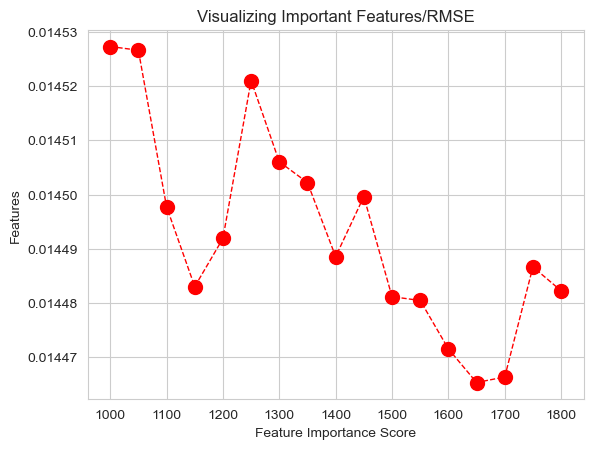

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1976,1,4,2,4,4,1,0,0,2,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
1,1968,1,4,2,9,0,0,0,0,7,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
2,1976,1,4,1,12,0,7,0,0,0,...,0.000000,2.0,0.142857,0.142857,0.000000,1.000000,0.000000,2.000000,0.033333,0.285714
3,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
4,1960,2,3,4,11,0,7,0,0,0,...,0.285714,2.0,0.571429,0.142857,0.142857,0.142857,0.571429,1.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1950,2,3,2,10,0,7,0,0,0,...,0.285714,3.0,0.142857,0.428571,3.000000,3.000000,0.428571,1.000000,0.066667,0.066667
7831,1968,1,3,2,4,0,2,0,0,3,...,0.285714,2.0,0.142857,0.285714,0.428571,0.285714,0.285714,0.714286,0.428571,0.285714
7832,1949,2,2,2,10,0,5,0,0,2,...,0.142857,2.0,0.142857,0.285714,0.000000,0.000000,0.285714,1.000000,0.000000,0.428571
7833,1940,2,1,5,10,0,4,0,0,3,...,0.000000,2.0,0.066667,0.033333,0.033333,0.033333,0.000000,1.000000,0.000000,0.000000


In [18]:
completing_values(data1,0,27,26,'是否吃大米')

In [19]:
data1.是否吃大米.isnull().sum()

0

In [20]:
data1_1=data1[data1['是否吃大米']==1]
data1_2=data1[data1['是否吃大米']==2]

7
0.37775949200487186


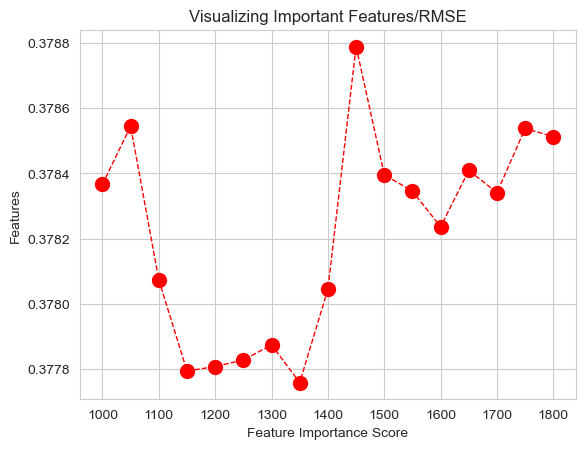

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1976,1,4,2,4,4,1,0,0,2,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
1,1968,1,4,2,9,0,0,0,0,7,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
2,1976,1,4,1,12,0,7,0,0,0,...,0.000000,2.0,0.142857,0.142857,0.000000,1.000000,0.000000,2.000000,0.033333,0.285714
3,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
4,1960,2,3,4,11,0,7,0,0,0,...,0.285714,2.0,0.571429,0.142857,0.142857,0.142857,0.571429,1.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1950,2,3,2,10,0,7,0,0,0,...,0.285714,3.0,0.142857,0.428571,3.000000,3.000000,0.428571,1.000000,0.066667,0.066667
7831,1968,1,3,2,4,0,2,0,0,3,...,0.285714,2.0,0.142857,0.285714,0.428571,0.285714,0.285714,0.714286,0.428571,0.285714
7832,1949,2,2,2,10,0,5,0,0,2,...,0.142857,2.0,0.142857,0.285714,0.000000,0.000000,0.285714,1.000000,0.000000,0.428571
7833,1940,2,1,5,10,0,4,0,0,3,...,0.000000,2.0,0.066667,0.033333,0.033333,0.033333,0.000000,1.000000,0.000000,0.000000


In [21]:
completing_values(data1_1,0,28,27,'大米平均每次食用量')

In [22]:
data1 = pd.concat([data1_1, data1_2],axis=0,ignore_index=False)
data1

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1976,1,4,2,4,4,1,0,0,2,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
1,1968,1,4,2,9,0,0,0,0,7,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
2,1976,1,4,1,12,0,7,0,0,0,...,0.000000,2.0,0.142857,0.142857,0.000000,1.000000,0.000000,2.000000,0.033333,0.285714
3,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
4,1960,2,3,4,11,0,7,0,0,0,...,0.285714,2.0,0.571429,0.142857,0.142857,0.142857,0.571429,1.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5468,1971,2,3,2,10,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6228,1957,1,4,2,1,0,0,0,0,7,...,0.066667,2.0,0.033333,0.285714,0.100000,0.066667,0.000000,0.100000,0.000000,1.000000
6774,1977,2,5,2,4,0,0,0,5,2,...,0.000000,2.0,0.100000,1.000000,0.000000,0.033333,0.142857,0.714286,0.285714,0.000000
6980,1953,2,2,2,1,0,7,0,0,0,...,0.033333,2.0,0.000000,0.428571,0.000000,0.285714,0.066667,1.000000,0.033333,0.285714


10
0.15182495750612182


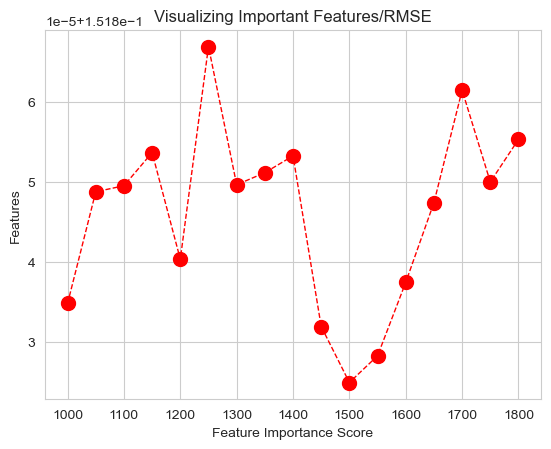

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1976,1,4,2,4,4,1,0,0,2,...,0.066667,1.0,0.066667,0.142857,0.000000,0.000000,0.428571,0.285714,0.000000,0.142857
1,1968,1,4,2,9,0,0,0,0,7,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
2,1976,1,4,1,12,0,7,0,0,0,...,0.000000,2.0,0.142857,0.142857,0.000000,1.000000,0.000000,2.000000,0.033333,0.285714
3,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
4,1960,2,3,4,11,0,7,0,0,0,...,0.285714,2.0,0.571429,0.142857,0.142857,0.142857,0.571429,1.000000,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5468,1971,2,3,2,10,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6228,1957,1,4,2,1,0,0,0,0,7,...,0.066667,2.0,0.033333,0.285714,0.100000,0.066667,0.000000,0.100000,0.000000,1.000000
6774,1977,2,5,2,4,0,0,0,5,2,...,0.000000,2.0,0.100000,1.000000,0.000000,0.033333,0.142857,0.714286,0.285714,0.000000
6980,1953,2,2,2,1,0,7,0,0,0,...,0.033333,2.0,0.000000,0.428571,0.000000,0.285714,0.066667,1.000000,0.033333,0.285714


In [23]:
completing_values(data1,0,29,26,'是否吃小麦面粉')

In [24]:
data1_1=data1[data1['是否吃小麦面粉']==1]
data1_2=data1[data1['是否吃小麦面粉']==2]

0
0.43826937289679935


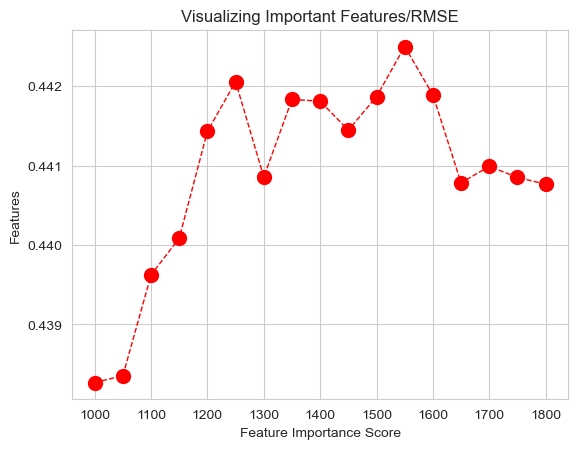

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
1,1968,1,4,2,9,0,0,0,0,7,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
2,1976,1,4,1,12,0,7,0,0,0,...,0.000000,2.0,0.142857,0.142857,0.000000,1.000000,0.000000,2.000000,0.033333,0.285714
3,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
4,1960,2,3,4,11,0,7,0,0,0,...,0.285714,2.0,0.571429,0.142857,0.142857,0.142857,0.571429,1.000000,1.000000,0.000000
5,1965,1,3,2,9,0,0,0,0,7,...,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.285714,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,1977,2,4,2,12,0,7,0,0,0,...,0.428571,2.0,0.142857,0.000000,0.000000,0.000000,0.033333,0.142857,1.000000,1.000000
6228,1957,1,4,2,1,0,0,0,0,7,...,0.066667,2.0,0.033333,0.285714,0.100000,0.066667,0.000000,0.100000,0.000000,1.000000
6774,1977,2,5,2,4,0,0,0,5,2,...,0.000000,2.0,0.100000,1.000000,0.000000,0.033333,0.142857,0.714286,0.285714,0.000000
6980,1953,2,2,2,1,0,7,0,0,0,...,0.033333,2.0,0.000000,0.428571,0.000000,0.285714,0.066667,1.000000,0.033333,0.285714


In [25]:
completing_values(data1_1,0,30,27,'小麦面粉平均每次食用量')

In [26]:
data1 = pd.concat([data1_1, data1_2],axis=0,ignore_index=False)

14
0.1636583206902232


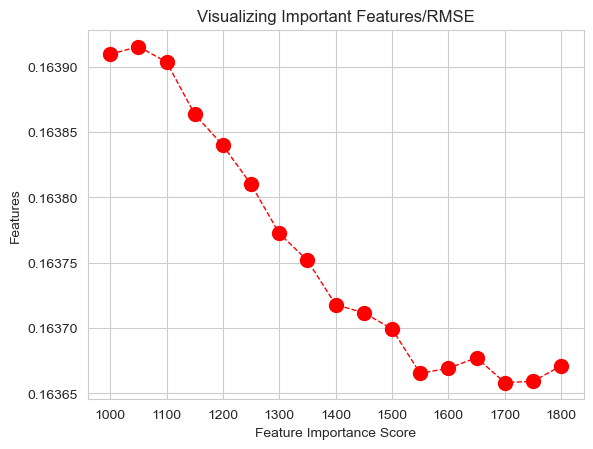

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
1,1968,1,4,2,9,0,0,0,0,7,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
2,1976,1,4,1,12,0,7,0,0,0,...,0.000000,2.0,0.142857,0.142857,0.000000,1.000000,0.000000,2.000000,0.033333,0.285714
3,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
4,1960,2,3,4,11,0,7,0,0,0,...,0.285714,2.0,0.571429,0.142857,0.142857,0.142857,0.571429,1.000000,1.000000,0.000000
5,1965,1,3,2,9,0,0,0,0,7,...,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.285714,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825,1971,2,3,2,10,5,2,0,0,0,...,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
7828,1942,2,2,5,2,0,7,0,0,0,...,0.000000,2.0,0.066667,0.142857,0.000000,0.000000,0.066667,1.000000,0.000000,0.000000
1300,1981,2,5,1,5,0,7,0,0,0,...,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.142857,2.000000,1.000000,0.285714
4284,1953,2,2,2,2,0,6,1,0,0,...,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.428571,0.033333,0.033333


In [27]:
completing_values(data1,0,31,26,'是否吃杂粮')

In [28]:
data1_1=data1[data1['是否吃小麦面粉']==1]
data1_2=data1[data1['是否吃小麦面粉']==2]

16
0.40772722794818134


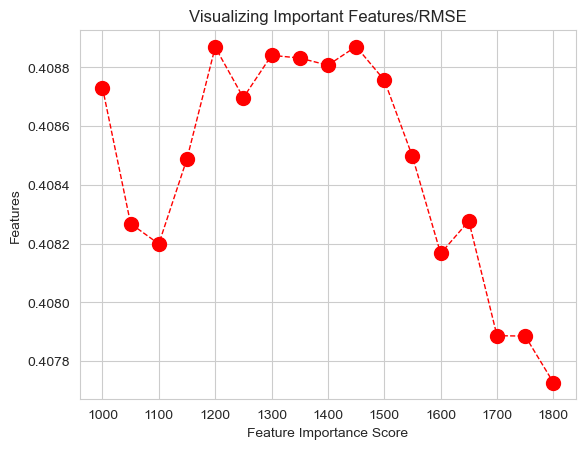

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
1,1968,1,4,2,9,0,0,0,0,7,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
2,1976,1,4,1,12,0,7,0,0,0,...,0.000000,2.0,0.142857,0.142857,0.000000,1.000000,0.000000,2.000000,0.033333,0.285714
3,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
4,1960,2,3,4,11,0,7,0,0,0,...,0.285714,2.0,0.571429,0.142857,0.142857,0.142857,0.571429,1.000000,1.000000,0.000000
5,1965,1,3,2,9,0,0,0,0,7,...,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.285714,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1511,1977,2,4,2,12,0,7,0,0,0,...,0.428571,2.0,0.142857,0.000000,0.000000,0.000000,0.033333,0.142857,1.000000,1.000000
6228,1957,1,4,2,1,0,0,0,0,7,...,0.066667,2.0,0.033333,0.285714,0.100000,0.066667,0.000000,0.100000,0.000000,1.000000
6774,1977,2,5,2,4,0,0,0,5,2,...,0.000000,2.0,0.100000,1.000000,0.000000,0.033333,0.142857,0.714286,0.285714,0.000000
6980,1953,2,2,2,1,0,7,0,0,0,...,0.033333,2.0,0.000000,0.428571,0.000000,0.285714,0.066667,1.000000,0.033333,0.285714


In [29]:
completing_values(data1_1,0,32,27,'杂粮平均每次食用量')

15
0.14397755726642417


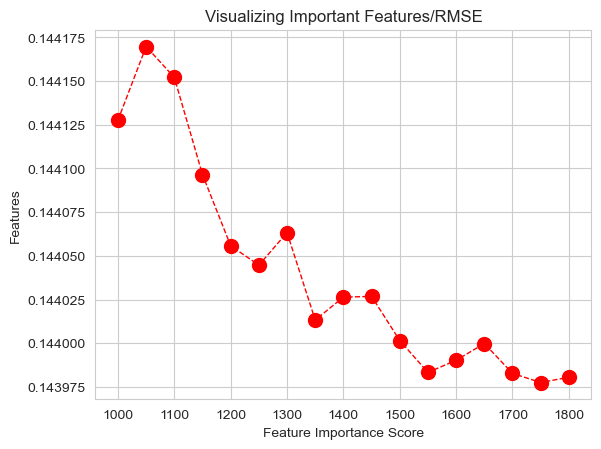

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
1,1968,1,4,2,9,0,0,0,0,7,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000
2,1976,1,4,1,12,0,7,0,0,0,...,0.000000,2.0,0.142857,0.142857,0.000000,1.000000,0.000000,2.000000,0.033333,0.285714
3,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
4,1960,2,3,4,11,0,7,0,0,0,...,0.285714,2.0,0.571429,0.142857,0.142857,0.142857,0.571429,1.000000,1.000000,0.000000
5,1965,1,3,2,9,0,0,0,0,7,...,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.285714,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825,1971,2,3,2,10,5,2,0,0,0,...,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
7828,1942,2,2,5,2,0,7,0,0,0,...,0.000000,2.0,0.066667,0.142857,0.000000,0.000000,0.066667,1.000000,0.000000,0.000000
1300,1981,2,5,1,5,0,7,0,0,0,...,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.142857,2.000000,1.000000,0.285714
4284,1953,2,2,2,2,0,6,1,0,0,...,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.428571,0.033333,0.033333


In [30]:
data1 = pd.concat([data1_1, data1_2],axis=0,ignore_index=False)
completing_values(data1,0,33,26,'是否吃薯类')

13
0.23110521040341983


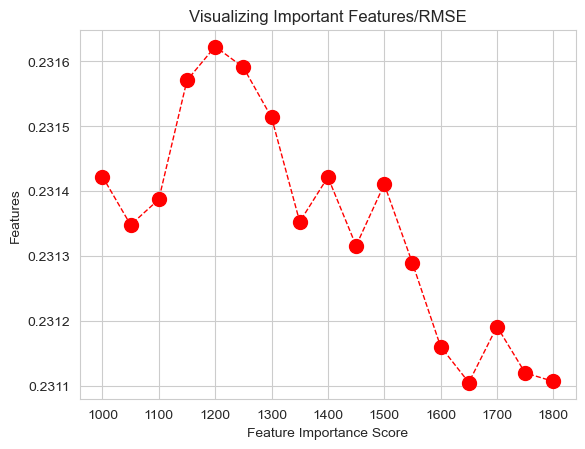

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
2,1976,1,4,1,12,0,7,0,0,0,...,0.000000,2.0,0.142857,0.142857,0.000000,1.000000,0.000000,2.000000,0.033333,0.285714
3,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
4,1960,2,3,4,11,0,7,0,0,0,...,0.285714,2.0,0.571429,0.142857,0.142857,0.142857,0.571429,1.000000,1.000000,0.000000
8,1949,1,3,2,11,0,7,0,0,0,...,0.033333,2.0,0.000000,0.033333,0.033333,0.033333,0.000000,1.000000,0.000000,0.000000
9,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.0,0.100000,0.033333,0.000000,0.033333,0.571429,1.000000,0.066667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7777,1956,2,2,2,2,0,7,0,0,0,...,0.033333,2.0,0.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7786,1974,1,4,2,4,7,0,0,0,0,...,0.000000,1.0,0.142857,0.000000,0.000000,0.000000,0.000000,1.000000,0.285714,0.000000
7804,1971,1,4,2,9,0,7,0,0,0,...,0.285714,2.0,0.428571,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
7828,1942,2,2,5,2,0,7,0,0,0,...,0.000000,2.0,0.066667,0.142857,0.000000,0.000000,0.066667,1.000000,0.000000,0.000000


In [31]:
data1_1=data1[data1['是否吃薯类']==1]
data1_2=data1[data1['是否吃薯类']==2]
completing_values(data1_1,0,34,27,'薯类平均每次食用量')

16
0.19337613560760888


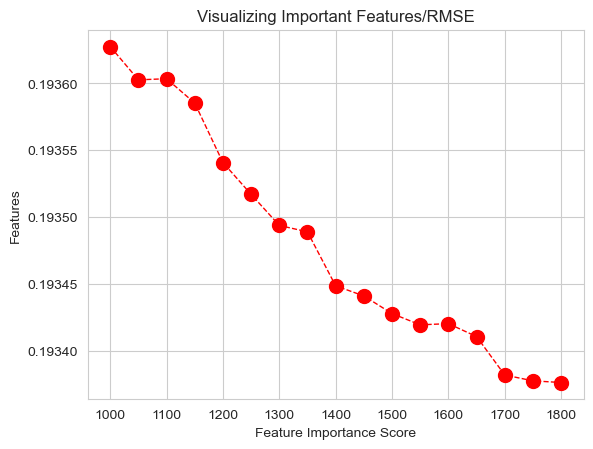

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
2,1976,1,4,1,12,0,7,0,0,0,...,0.000000,2.0,0.142857,0.142857,0.000000,1.000000,0.000000,2.000000,0.033333,0.285714
3,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
4,1960,2,3,4,11,0,7,0,0,0,...,0.285714,2.0,0.571429,0.142857,0.142857,0.142857,0.571429,1.000000,1.000000,0.000000
8,1949,1,3,2,11,0,7,0,0,0,...,0.033333,2.0,0.000000,0.033333,0.033333,0.033333,0.000000,1.000000,0.000000,0.000000
9,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.0,0.100000,0.033333,0.000000,0.033333,0.571429,1.000000,0.066667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7814,1983,1,4,2,4,0,0,0,0,7,...,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,1.285714
7822,1970,2,3,2,12,0,3,0,0,4,...,0.000000,2.0,0.000000,0.000000,0.000000,0.033333,0.285714,0.571429,0.000000,0.142857
7825,1971,2,3,2,10,5,2,0,0,0,...,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
1300,1981,2,5,1,5,0,7,0,0,0,...,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.142857,2.000000,1.000000,0.285714


In [32]:
data1 = pd.concat([data1_1, data1_2],axis=0,ignore_index=False)
completing_values(data1,0,35,26,'是否吃油炸面食')

1
0.30510745089283


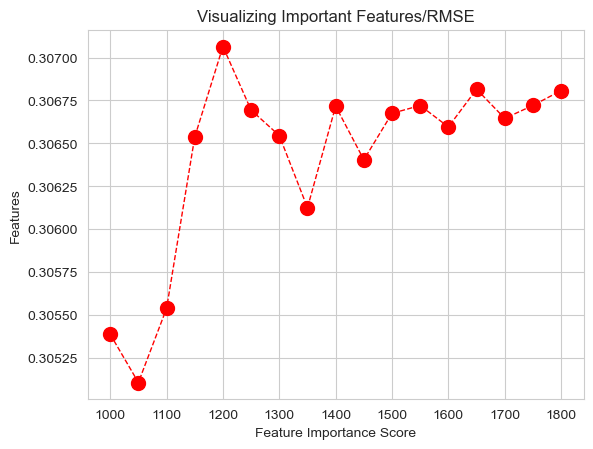

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
2,1976,1,4,1,12,0,7,0,0,0,...,0.000000,2.0,0.142857,0.142857,0.000000,1.000000,0.000000,2.000000,0.033333,0.285714
3,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
4,1960,2,3,4,11,0,7,0,0,0,...,0.285714,2.0,0.571429,0.142857,0.142857,0.142857,0.571429,1.000000,1.000000,0.000000
9,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.0,0.100000,0.033333,0.000000,0.033333,0.571429,1.000000,0.066667,0.000000
12,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.0,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7631,1964,1,5,4,9,2,0,0,0,5,...,0.033333,2.0,0.066667,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,0.000000
7698,1967,1,3,2,2,0,7,0,0,0,...,0.000000,2.0,0.000000,0.000000,0.000000,0.033333,0.285714,0.571429,0.000000,0.000000
7700,1968,1,3,2,2,0,5,0,0,2,...,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.285714,0.571429,0.000000,0.000000
7701,1970,1,4,2,4,0,4,0,0,3,...,0.000000,2.0,0.000000,0.000000,0.000000,0.033333,0.285714,0.428571,0.000000,0.285714


In [33]:
data1_1=data1[data1['是否吃油炸面食']==1]
data1_2=data1[data1['是否吃油炸面食']==2]
completing_values(data1_1,0,36,27,'油炸面食平均每次食用量')

16
0.04862220545946391


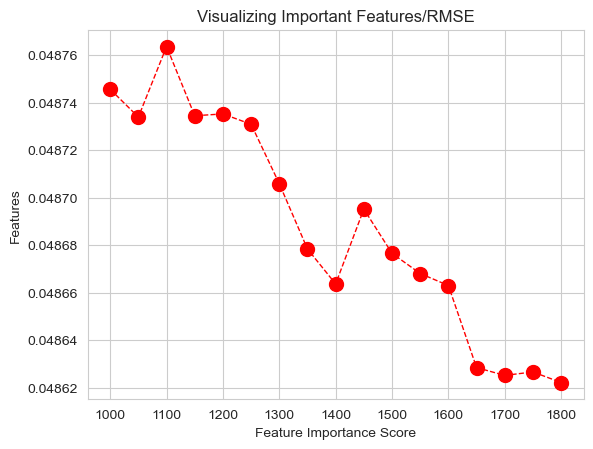

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
2,1976,1,4,1,12,0,7,0,0,0,...,0.000000,2.0,0.142857,0.142857,0.000000,1.000000,0.000000,2.000000,0.033333,0.285714
3,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
4,1960,2,3,4,11,0,7,0,0,0,...,0.285714,2.0,0.571429,0.142857,0.142857,0.142857,0.571429,1.000000,1.000000,0.000000
9,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.0,0.100000,0.033333,0.000000,0.033333,0.571429,1.000000,0.066667,0.000000
12,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.0,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7814,1983,1,4,2,4,0,0,0,0,7,...,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,1.285714
7822,1970,2,3,2,12,0,3,0,0,4,...,0.000000,2.0,0.000000,0.000000,0.000000,0.033333,0.285714,0.571429,0.000000,0.142857
7825,1971,2,3,2,10,5,2,0,0,0,...,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
1300,1981,2,5,1,5,0,7,0,0,0,...,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.142857,2.000000,1.000000,0.285714


In [34]:
data1 = pd.concat([data1_1, data1_2],axis=0,ignore_index=False)
completing_values(data1,0,37,26,'是否吃猪肉')

16
0.3674212999157262


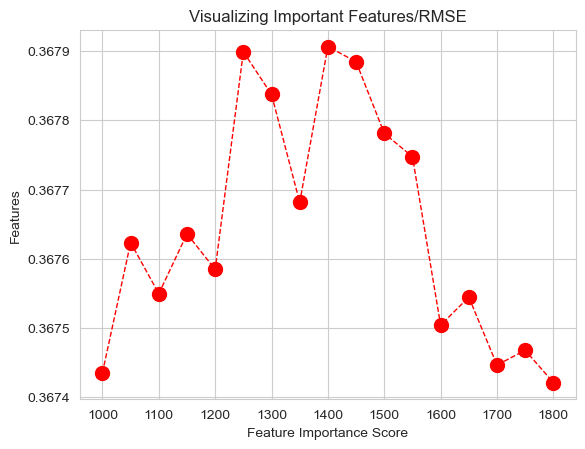

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
2,1976,1,4,1,12,0,7,0,0,0,...,0.000000,2.0,0.142857,0.142857,0.000000,1.000000,0.000000,2.000000,0.033333,0.285714
3,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
4,1960,2,3,4,11,0,7,0,0,0,...,0.285714,2.0,0.571429,0.142857,0.142857,0.142857,0.571429,1.000000,1.000000,0.000000
9,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.0,0.100000,0.033333,0.000000,0.033333,0.571429,1.000000,0.066667,0.000000
12,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.0,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,1975,1,4,1,1,0,0,0,0,7,...,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.000000,0.000000
7814,1983,1,4,2,4,0,0,0,0,7,...,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,1.285714
7822,1970,2,3,2,12,0,3,0,0,4,...,0.000000,2.0,0.000000,0.000000,0.000000,0.033333,0.285714,0.571429,0.000000,0.142857
7825,1971,2,3,2,10,5,2,0,0,0,...,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000


In [35]:
data1_1=data1[data1['是否吃猪肉']==1]
data1_2=data1[data1['是否吃猪肉']==2]
completing_values(data1_1,0,38,27,'猪肉平均每次食用量')

11
0.18598321424919736


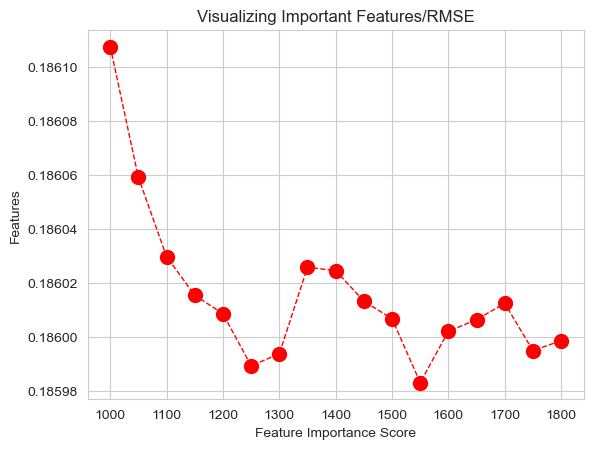

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
2,1976,1,4,1,12,0,7,0,0,0,...,0.000000,2.0,0.142857,0.142857,0.000000,1.000000,0.000000,2.000000,0.033333,0.285714
3,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
4,1960,2,3,4,11,0,7,0,0,0,...,0.285714,2.0,0.571429,0.142857,0.142857,0.142857,0.571429,1.000000,1.000000,0.000000
9,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.0,0.100000,0.033333,0.000000,0.033333,0.571429,1.000000,0.066667,0.000000
12,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.0,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6935,1965,1,5,2,7,0,2,0,5,0,...,0.142857,2.0,0.142857,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000
515,1970,1,4,2,1,0,0,0,0,7,...,0.000000,1.0,0.000000,0.166667,0.000000,0.000000,0.066667,1.000000,0.000000,0.000000
2973,1967,2,4,2,12,2,2,0,0,4,...,0.000000,2.0,0.066667,0.000000,0.000000,0.000000,0.000000,0.571429,0.142857,0.142857
4466,1968,2,3,2,10,7,0,0,0,0,...,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,0.000000,0.000000


In [36]:
data1 = pd.concat([data1_1, data1_2],axis=0,ignore_index=False)
completing_values(data1,0,39,26,'是否吃牛羊肉')

3
0.4384680801664145


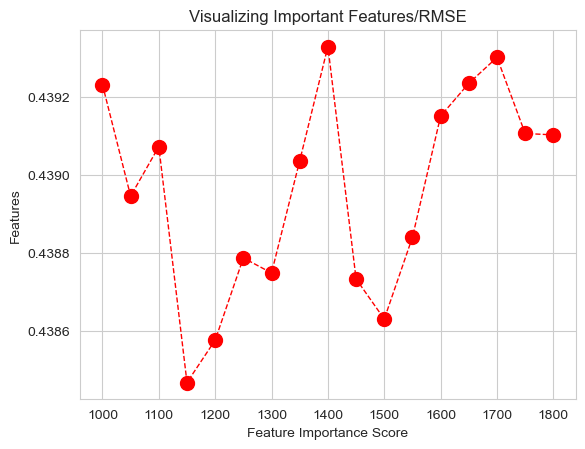

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
2,1976,1,4,1,12,0,7,0,0,0,...,0.000000,2.0,0.142857,0.142857,0.000000,1.000000,0.000000,2.000000,0.033333,0.285714
3,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
4,1960,2,3,4,11,0,7,0,0,0,...,0.285714,2.0,0.571429,0.142857,0.142857,0.142857,0.571429,1.000000,1.000000,0.000000
9,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.0,0.100000,0.033333,0.000000,0.033333,0.571429,1.000000,0.066667,0.000000
12,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.0,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3356,1981,1,4,2,9,0,7,0,0,0,...,0.166667,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333
6935,1965,1,5,2,7,0,2,0,5,0,...,0.142857,2.0,0.142857,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000
515,1970,1,4,2,1,0,0,0,0,7,...,0.000000,1.0,0.000000,0.166667,0.000000,0.000000,0.066667,1.000000,0.000000,0.000000
2973,1967,2,4,2,12,2,2,0,0,4,...,0.000000,2.0,0.066667,0.000000,0.000000,0.000000,0.000000,0.571429,0.142857,0.142857


In [37]:
data1_1=data1[data1['是否吃牛羊肉']==1]
data1_2=data1[data1['是否吃牛羊肉']==2]
completing_values(data1_1,0,40,27,'牛羊肉平均每次食用量')

0
0.09767979482006038


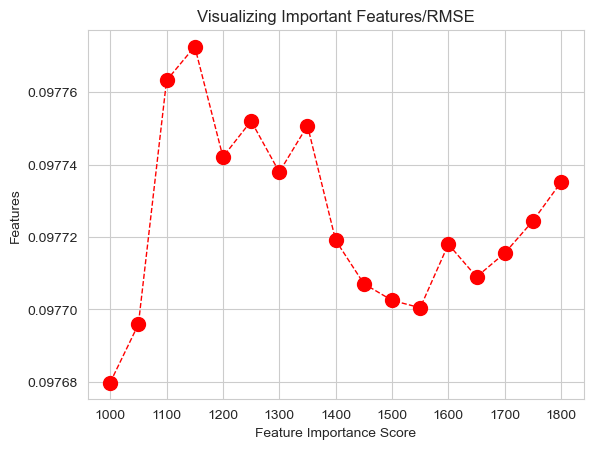

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
2,1976,1,4,1,12,0,7,0,0,0,...,0.000000,2.000000,0.142857,0.142857,0.000000,1.000000,0.000000,2.000000,0.033333,0.285714
3,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.000000,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
4,1960,2,3,4,11,0,7,0,0,0,...,0.285714,2.000000,0.571429,0.142857,0.142857,0.142857,0.571429,1.000000,1.000000,0.000000
9,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.000000,0.100000,0.033333,0.000000,0.033333,0.571429,1.000000,0.066667,0.000000
12,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.000000,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3349,1981,2,3,2,9,0,7,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000
3352,1979,1,3,2,9,0,7,0,0,0,...,0.000000,3.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3354,1979,1,3,2,9,0,7,0,0,0,...,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.133333,0.000000,0.000000
3693,1948,2,2,2,11,0,7,0,0,0,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.428571,1.000000,0.000000,0.000000


In [38]:
data1 = pd.concat([data1_1, data1_2],axis=0,ignore_index=False)
completing_values(data1,0,41,26,'是否吃禽肉')

11
0.5002115229306632


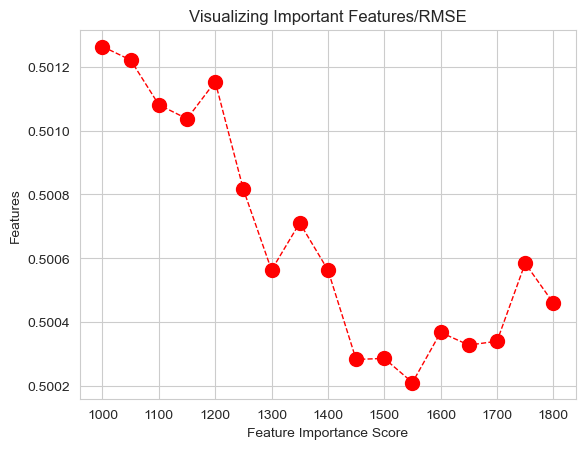

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
2,1976,1,4,1,12,0,7,0,0,0,...,0.000000,2.000000,0.142857,0.142857,0.000000,1.000000,0.000000,2.000000,0.033333,0.285714
3,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.000000,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
4,1960,2,3,4,11,0,7,0,0,0,...,0.285714,2.000000,0.571429,0.142857,0.142857,0.142857,0.571429,1.000000,1.000000,0.000000
9,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.000000,0.100000,0.033333,0.000000,0.033333,0.571429,1.000000,0.066667,0.000000
12,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.000000,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1885,1976,2,4,2,10,7,0,0,0,0,...,0.000000,1.000000,0.142857,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.066667
3347,1979,2,3,2,10,0,7,0,0,0,...,0.066667,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
5221,1961,2,3,2,10,1,6,0,0,0,...,0.066667,3.000000,0.000000,0.033333,0.000000,0.285714,0.000000,0.142857,0.000000,0.000000
3352,1979,1,3,2,9,0,7,0,0,0,...,0.000000,3.033333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [39]:
data1_1=data1[data1['是否吃禽肉']==1]
data1_2=data1[data1['是否吃禽肉']==2]
completing_values(data1_1,0,42,27,'禽肉平均每次食用量')

16
0.20119203710717493


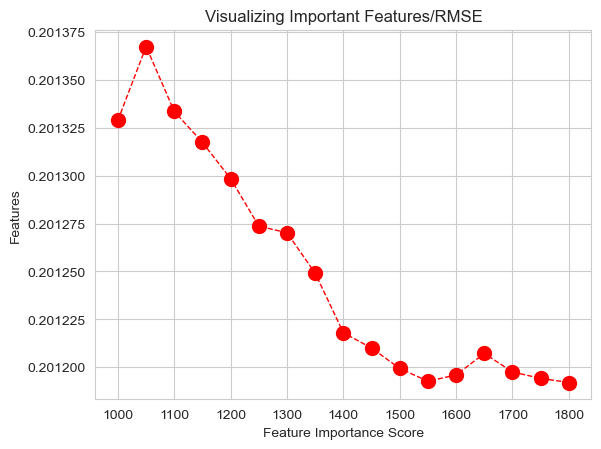

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
2,1976,1,4,1,12,0,7,0,0,0,...,0.000000,2.0,0.142857,0.142857,0.000000,1.000000,0.000000,2.000000,0.033333,0.285714
3,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
4,1960,2,3,4,11,0,7,0,0,0,...,0.285714,2.0,0.571429,0.142857,0.142857,0.142857,0.571429,1.000000,1.000000,0.000000
9,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.0,0.100000,0.033333,0.000000,0.033333,0.571429,1.000000,0.066667,0.000000
12,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.0,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981,1974,2,6,2,4,0,7,0,0,0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
2604,1977,2,3,2,1,0,0,0,0,7,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000
3349,1981,2,3,2,9,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000
3693,1948,2,2,2,11,0,7,0,0,0,...,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.428571,1.000000,0.000000,0.000000


In [40]:
data1 = pd.concat([data1_1, data1_2],axis=0,ignore_index=False)
completing_values(data1,0,43,26,'是否吃内脏类')

11
0.29313250916583883


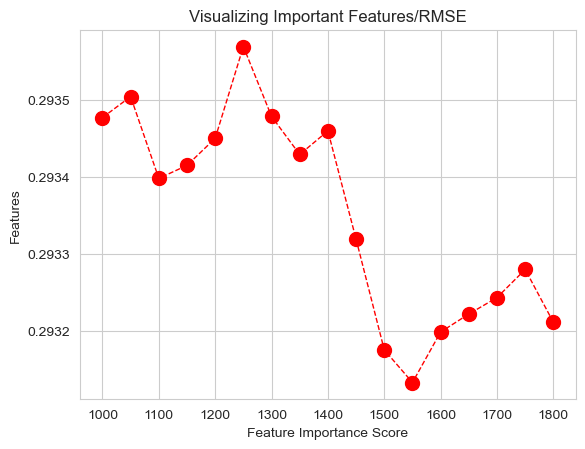

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
3,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.000000,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
9,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.000000,0.100000,0.033333,0.000000,0.033333,0.571429,1.000000,0.066667,0.000000
12,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.000000,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
15,1976,1,3,2,9,0,0,0,7,0,...,0.033333,2.000000,0.100000,0.000000,0.000000,0.000000,0.033333,1.000000,0.100000,0.100000
20,1979,1,5,2,5,0,7,0,0,0,...,0.142857,2.000000,0.066667,0.033333,0.033333,0.033333,0.428571,1.000000,0.285714,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6242,1946,1,1,2,12,0,7,0,0,0,...,0.066667,0.066667,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000
2643,1982,2,4,2,6,0,0,3,0,4,...,0.000000,1.000000,0.285714,0.000000,0.000000,0.142857,0.571429,1.000000,0.571429,0.000000
7020,1970,1,3,2,9,0,0,0,0,7,...,0.066667,2.000000,0.066667,0.100000,0.100000,0.066667,0.000000,1.000000,0.285714,0.285714
3184,1946,2,3,2,11,0,7,0,0,0,...,0.428571,3.000000,0.142857,0.033333,0.033333,0.000000,0.000000,3.000000,0.000000,0.000000


In [41]:
data1_1=data1[data1['是否吃内脏类']==1]
data1_2=data1[data1['是否吃内脏类']==2]
completing_values(data1_1,0,44,27,'内脏类平均每次食用量')

5
0.0896994262011381


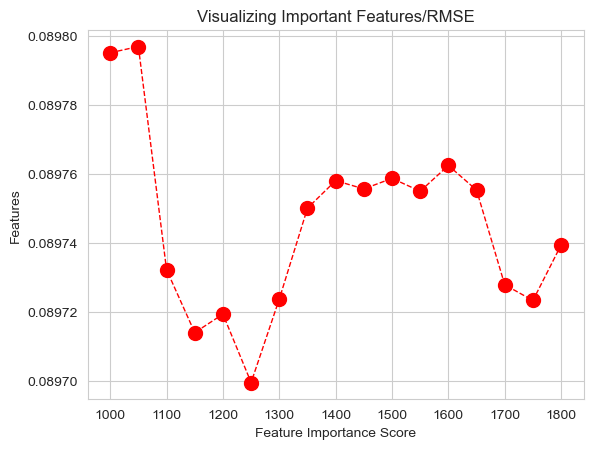

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
3,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.0,0.285714,0.428571
9,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.0,0.100000,0.033333,0.000000,0.033333,0.571429,1.0,0.066667,0.000000
12,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.0,0.285714,0.066667,0.066667,0.066667,0.066667,2.0,0.285714,0.285714
15,1976,1,3,2,9,0,0,0,7,0,...,0.033333,2.0,0.100000,0.000000,0.000000,0.000000,0.033333,1.0,0.100000,0.100000
20,1979,1,5,2,5,0,7,0,0,0,...,0.142857,2.0,0.066667,0.033333,0.033333,0.033333,0.428571,1.0,0.285714,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7689,1975,1,5,2,7,0,7,0,0,0,...,0.033333,2.0,0.285714,0.142857,0.000000,0.142857,0.000000,1.0,0.000000,0.000000
1981,1974,2,6,2,4,0,7,0,0,0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.0,0.000000,0.000000
2604,1977,2,3,2,1,0,0,0,0,7,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,1.000000,0.000000
3693,1948,2,2,2,11,0,7,0,0,0,...,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.428571,1.0,0.000000,0.000000


In [42]:
data1 = pd.concat([data1_1, data1_2],axis=0,ignore_index=False)
completing_values(data1,0,45,26,'是否吃水产类')

16
0.56340722093172


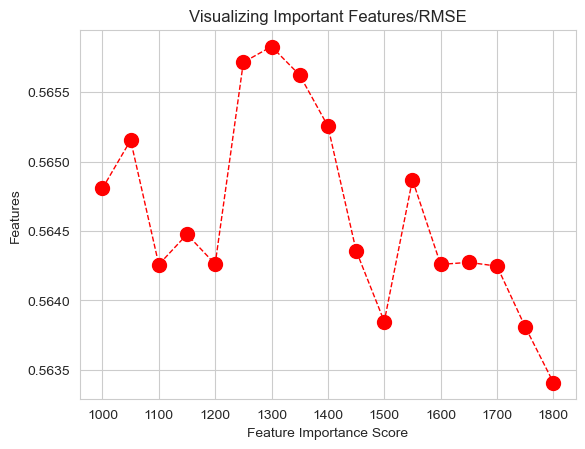

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
3,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.000000,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
9,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.000000,0.100000,0.033333,0.000000,0.033333,0.571429,1.000000,0.066667,0.000000
12,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.000000,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
15,1976,1,3,2,9,0,0,0,7,0,...,0.033333,2.000000,0.100000,0.000000,0.000000,0.000000,0.033333,1.000000,0.100000,0.100000
20,1979,1,5,2,5,0,7,0,0,0,...,0.142857,2.000000,0.066667,0.033333,0.033333,0.033333,0.428571,1.000000,0.285714,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,1947,2,4,2,11,0,7,0,0,0,...,0.066667,2.000000,0.428571,1.000000,0.066667,0.133333,0.033333,0.571429,0.000000,0.000000
2003,1969,2,5,2,4,0,5,0,0,2,...,0.142857,0.142857,0.142857,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
2177,1940,2,3,2,11,0,7,0,0,0,...,0.428571,2.000000,0.428571,0.000000,0.000000,0.000000,0.285714,0.571429,0.428571,0.285714
3683,1946,2,5,2,11,0,7,0,0,0,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000


In [43]:
data1_1=data1[data1['是否吃水产类']==1]
data1_2=data1[data1['是否吃水产类']==2]
completing_values(data1_1,0,46,27,'水产类平均每次食用量')

12
0.1989729141789045


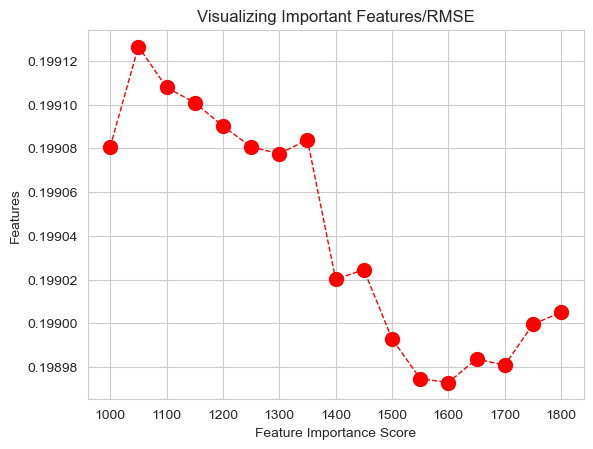

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
3,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.0,0.285714,0.428571
9,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.0,0.100000,0.033333,0.000000,0.033333,0.571429,1.0,0.066667,0.000000
12,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.0,0.285714,0.066667,0.066667,0.066667,0.066667,2.0,0.285714,0.285714
15,1976,1,3,2,9,0,0,0,7,0,...,0.033333,2.0,0.100000,0.000000,0.000000,0.000000,0.033333,1.0,0.100000,0.100000
20,1979,1,5,2,5,0,7,0,0,0,...,0.142857,2.0,0.066667,0.033333,0.033333,0.033333,0.428571,1.0,0.285714,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2641,1988,2,4,2,7,0,7,0,0,0,...,0.033333,0.0,0.285714,0.142857,0.000000,0.142857,0.000000,1.0,0.000000,0.000000
7689,1975,1,5,2,7,0,7,0,0,0,...,0.033333,2.0,0.285714,0.142857,0.000000,0.142857,0.000000,1.0,0.000000,0.000000
1981,1974,2,6,2,4,0,7,0,0,0,...,0.000000,2.0,0.142857,0.000000,0.000000,0.000000,0.000000,2.0,0.000000,0.000000
2604,1977,2,3,2,1,0,0,0,0,7,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.0,1.000000,0.000000


In [46]:
data1 = pd.concat([data1_1, data1_2],axis=0,ignore_index=False)
completing_values(data1,0,47,26,'是否吃鲜奶')

12
3.3463126096177263


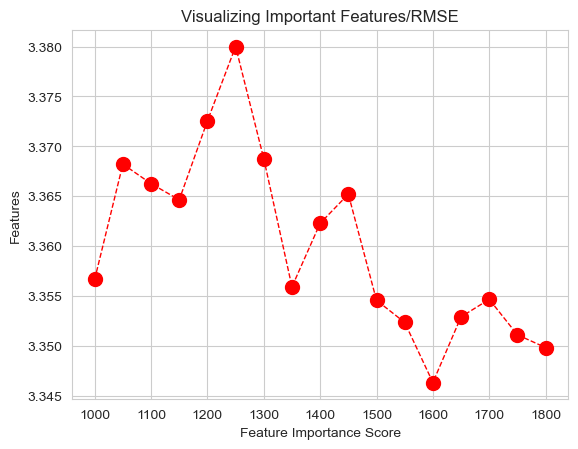

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
3,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
9,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.0,0.100000,0.033333,0.000000,0.033333,0.571429,1.000000,0.066667,0.000000
12,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.0,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
22,1980,2,4,2,9,0,0,0,0,7,...,0.000000,2.0,0.000000,0.010000,0.010000,0.033333,0.428571,0.428571,1.000000,1.000000
23,1978,1,5,2,5,0,2,0,5,0,...,0.100000,2.0,0.142857,0.000000,0.000000,0.000000,0.033333,0.428571,0.142857,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,1943,2,2,5,10,0,7,0,0,0,...,0.142857,2.0,0.142857,0.000000,0.000000,0.066667,0.000000,1.000000,0.000000,0.000000
2784,1979,2,2,2,10,0,7,0,0,0,...,0.428571,2.0,0.142857,0.066667,0.000000,0.066667,0.285714,1.000000,0.000000,1.000000
7679,1970,1,5,2,7,0,7,0,0,0,...,0.428571,3.0,0.428571,0.714286,0.066667,0.000000,0.066667,1.000000,0.000000,0.000000
2641,1988,2,4,2,7,0,7,0,0,0,...,0.033333,0.0,0.285714,0.142857,0.000000,0.142857,0.000000,1.000000,0.000000,0.000000


In [47]:
data1_1=data1[data1['是否吃鲜奶']==1]
data1_2=data1[data1['是否吃鲜奶']==2]
completing_values(data1_1,0,48,27,'鲜奶平均每次食用量')

11
0.11910900409925748


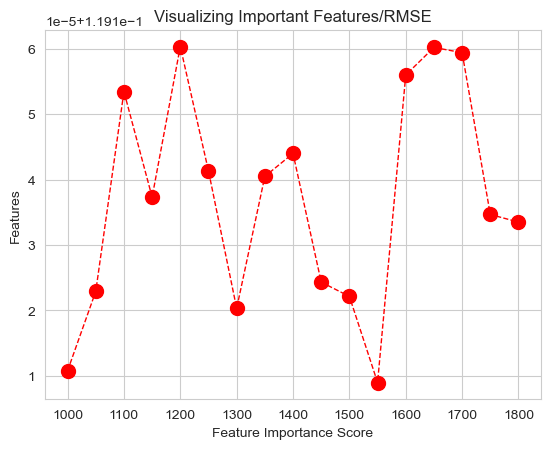

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
3,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
9,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.0,0.100000,0.033333,0.000000,0.033333,0.571429,1.000000,0.066667,0.000000
12,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.0,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
22,1980,2,4,2,9,0,0,0,0,7,...,0.000000,2.0,0.000000,0.010000,0.010000,0.033333,0.428571,0.428571,1.000000,1.000000
23,1978,1,5,2,5,0,2,0,5,0,...,0.100000,2.0,0.142857,0.000000,0.000000,0.000000,0.033333,0.428571,0.142857,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4368,1967,1,5,2,8,0,7,0,0,0,...,0.000000,2.0,0.285714,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000
5084,1954,2,3,4,10,0,7,0,0,0,...,0.285714,2.0,0.033333,0.142857,0.000000,0.066667,0.100000,1.000000,0.000000,0.000000
7689,1975,1,5,2,7,0,7,0,0,0,...,0.033333,2.0,0.285714,0.142857,0.000000,0.142857,0.000000,1.000000,0.000000,0.000000
2604,1977,2,3,2,1,0,0,0,0,7,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000


In [48]:
data1 = pd.concat([data1_1, data1_2],axis=0,ignore_index=False)
completing_values(data1,0,49,26,'是否吃奶粉')

16
0.44645972563149633


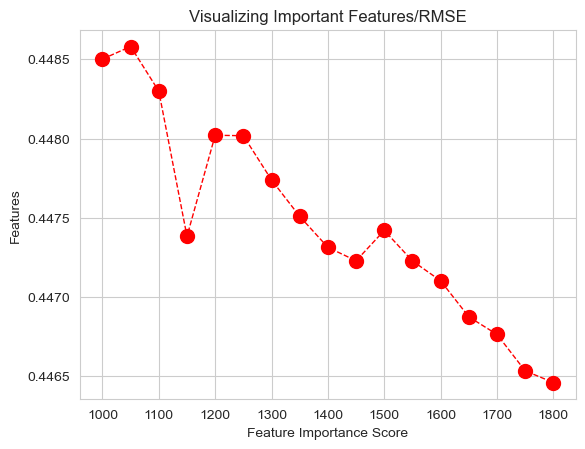

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
3,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
9,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.0,0.100000,0.033333,0.000000,0.033333,0.571429,1.000000,0.066667,0.000000
12,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.0,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
272,1963,1,4,2,1,0,3,0,0,4,...,0.066667,2.0,0.142857,0.033333,0.033333,0.033333,0.142857,0.571429,0.285714,0.033333
357,1977,1,5,2,6,0,1,0,4,2,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.033333,0.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5290,1959,2,4,2,10,0,7,0,0,0,...,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000
5156,1953,2,2,2,10,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
1611,1954,2,5,2,11,0,7,0,0,0,...,0.142857,2.0,0.142857,0.000000,0.000000,0.142857,1.000000,0.000000,0.000000,0.000000
3348,1969,2,2,2,10,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.066667,0.100000,0.000000,0.000000,0.000000,0.000000


In [50]:
data1_1=data1[data1['是否吃奶粉']==1]
data1_2=data1[data1['是否吃奶粉']==2]
completing_values(data1_1,0,50,27,'奶粉平均每次食用量')

In [64]:
data1.to_excel('out_put0.xlsx',index=False)

PermissionError: [Errno 13] Permission denied: 'out_put0.xlsx'

12
0.19844237657741604


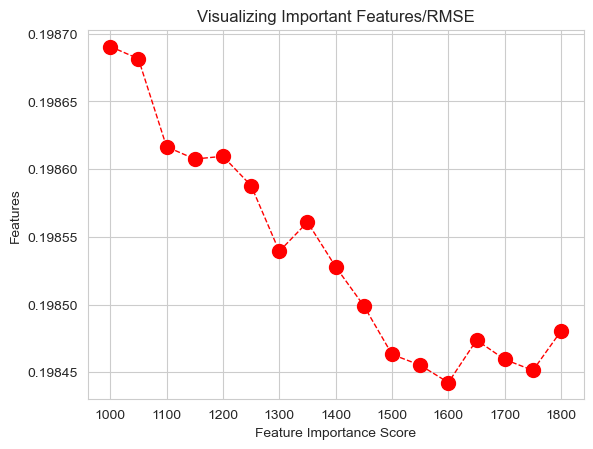

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
1,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.0,0.100000,0.033333,0.000000,0.033333,0.571429,1.000000,0.066667,0.000000
2,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.0,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
3,1980,2,4,2,9,0,0,0,0,7,...,0.000000,2.0,0.000000,0.010000,0.010000,0.033333,0.428571,0.428571,1.000000,1.000000
4,1978,1,5,2,5,0,2,0,5,0,...,0.100000,2.0,0.142857,0.000000,0.000000,0.000000,0.033333,0.428571,0.142857,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7830,1967,1,5,2,8,0,7,0,0,0,...,0.000000,2.0,0.285714,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000
7831,1954,2,3,4,10,0,7,0,0,0,...,0.285714,2.0,0.033333,0.142857,0.000000,0.066667,0.100000,1.000000,0.000000,0.000000
7832,1975,1,5,2,7,0,7,0,0,0,...,0.033333,2.0,0.285714,0.142857,0.000000,0.142857,0.000000,1.000000,0.000000,0.000000
7833,1977,2,3,2,1,0,0,0,0,7,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000


In [65]:
data1=pd.read_excel('out_put0.xlsx')
data1.是否吃酸奶.isnull().sum()
completing_values(data1,0,51,26,'是否吃酸奶')

In [59]:
# #data1 = pd.concat([data1_1, data1_2],axis=0,ignore_index=False)
# data1_1=data1[data1['是否吃酸奶']==1]
# data1_2=data1[data1['是否吃酸奶']==2]

16
2.9568587091613003


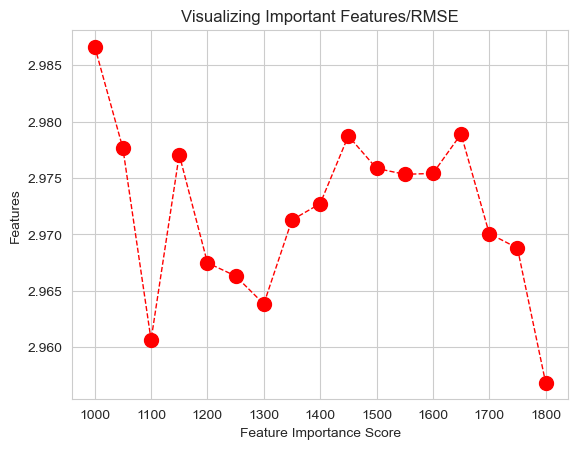

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
1,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.0,0.100000,0.033333,0.000000,0.033333,0.571429,1.000000,0.066667,0.000000
2,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.0,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
3,1980,2,4,2,9,0,0,0,0,7,...,0.000000,2.0,0.000000,0.010000,0.010000,0.033333,0.428571,0.428571,1.000000,1.000000
5,1971,1,3,2,9,2,0,0,0,5,...,0.000000,2.0,0.142857,0.033333,0.000000,0.033333,0.066667,0.428571,0.066667,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7826,1976,2,4,2,10,0,7,0,0,0,...,0.285714,1.0,0.000000,0.000000,0.000000,0.000000,0.285714,1.000000,0.000000,0.000000
7827,1983,2,4,2,9,0,7,0,0,0,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7830,1967,1,5,2,8,0,7,0,0,0,...,0.000000,2.0,0.285714,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000
7832,1975,1,5,2,7,0,7,0,0,0,...,0.033333,2.0,0.285714,0.142857,0.000000,0.142857,0.000000,1.000000,0.000000,0.000000


In [66]:
data1_1=data1[data1['是否吃酸奶']==1]
data1_2=data1[data1['是否吃酸奶']==2]
completing_values(data1_1,0,52,27,'酸奶平均每次食用量')

5
0.07897684276557478


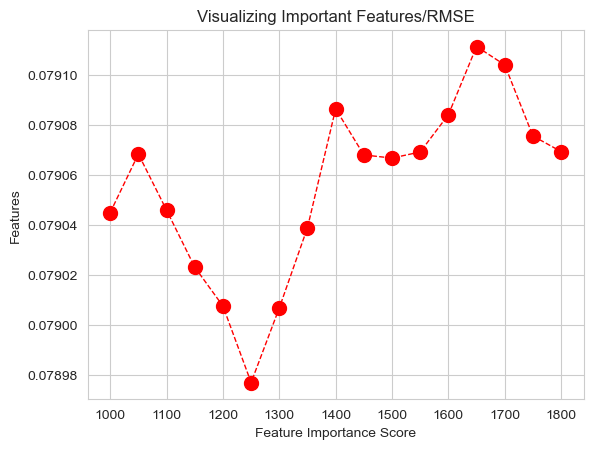

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
1,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.0,0.100000,0.033333,0.000000,0.033333,0.571429,1.000000,0.066667,0.000000
2,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.0,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
3,1980,2,4,2,9,0,0,0,0,7,...,0.000000,2.0,0.000000,0.010000,0.010000,0.033333,0.428571,0.428571,1.000000,1.000000
5,1971,1,3,2,9,2,0,0,0,5,...,0.000000,2.0,0.142857,0.033333,0.000000,0.033333,0.066667,0.428571,0.066667,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825,1953,2,2,2,2,0,7,0,0,0,...,0.000000,3.0,0.000000,0.000000,0.000000,0.000000,0.033333,2.000000,0.000000,0.000000
7828,1969,2,3,2,1,0,7,0,0,0,...,0.571429,2.0,0.100000,0.066667,0.000000,0.000000,0.066667,2.000000,0.000000,0.066667
7829,1964,2,4,2,10,0,7,0,0,0,...,0.714286,2.0,0.428571,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.285714
7831,1954,2,3,4,10,0,7,0,0,0,...,0.285714,2.0,0.033333,0.142857,0.000000,0.066667,0.100000,1.000000,0.000000,0.000000


In [67]:
data1 = pd.concat([data1_1, data1_2],axis=0,ignore_index=False)
completing_values(data1,0,53,26,'是否吃蛋类')

16
0.20275054097023323


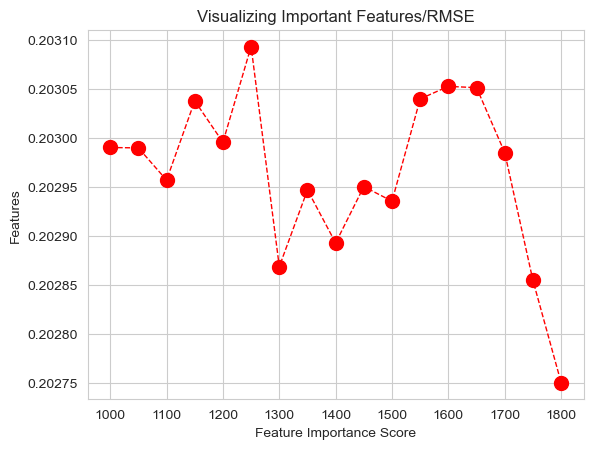

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
1,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.0,0.100000,0.033333,0.000000,0.033333,0.571429,1.000000,0.066667,0.000000
2,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.0,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
3,1980,2,4,2,9,0,0,0,0,7,...,0.000000,2.0,0.000000,0.010000,0.010000,0.033333,0.428571,0.428571,1.000000,1.000000
5,1971,1,3,2,9,2,0,0,0,5,...,0.000000,2.0,0.142857,0.033333,0.000000,0.033333,0.066667,0.428571,0.066667,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,1969,2,2,2,10,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.066667,0.100000,0.000000,0.000000,0.000000,0.000000
7817,1957,2,2,2,10,4,3,0,0,0,...,0.142857,3.0,0.000000,0.033333,0.000000,0.285714,0.000000,0.000000,0.000000,0.000000
7818,1963,2,3,2,1,7,0,0,0,0,...,0.000000,2.0,0.000000,0.000000,0.000000,0.033333,0.000000,1.000000,0.000000,0.000000
7821,1976,2,3,2,10,0,0,0,0,7,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.571429,0.000000,0.000000


In [69]:
data1_1=data1[data1['是否吃蛋类']==1]
data1_2=data1[data1['是否吃蛋类']==2]
completing_values(data1_1,0,54,27,'蛋类平均每次食用量')

12
0.10692311298110575


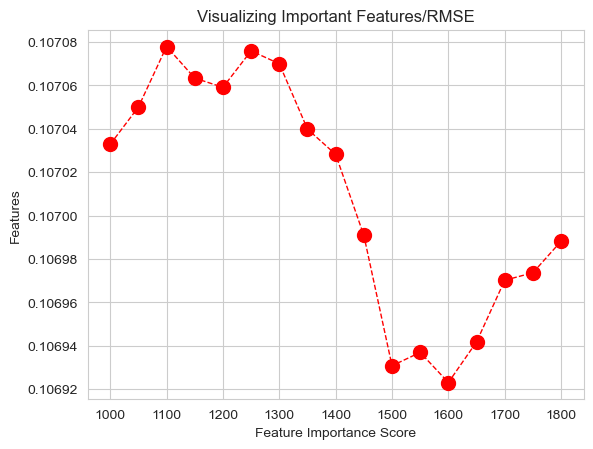

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
1,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.0,0.100000,0.033333,0.000000,0.033333,0.571429,1.000000,0.066667,0.000000
2,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.0,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
3,1980,2,4,2,9,0,0,0,0,7,...,0.000000,2.0,0.000000,0.010000,0.010000,0.033333,0.428571,0.428571,1.000000,1.000000
5,1971,1,3,2,9,2,0,0,0,5,...,0.000000,2.0,0.142857,0.033333,0.000000,0.033333,0.066667,0.428571,0.066667,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7825,1953,2,2,2,2,0,7,0,0,0,...,0.000000,3.0,0.000000,0.000000,0.000000,0.000000,0.033333,2.000000,0.000000,0.000000
7828,1969,2,3,2,1,0,7,0,0,0,...,0.571429,2.0,0.100000,0.066667,0.000000,0.000000,0.066667,2.000000,0.000000,0.066667
7829,1964,2,4,2,10,0,7,0,0,0,...,0.714286,2.0,0.428571,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.285714
7831,1954,2,3,4,10,0,7,0,0,0,...,0.285714,2.0,0.033333,0.142857,0.000000,0.066667,0.100000,1.000000,0.000000,0.000000


In [70]:
data1 = pd.concat([data1_1, data1_2],axis=0,ignore_index=False)
completing_values(data1,0,55,26,'是否吃豆腐')

13
0.4627198344799986


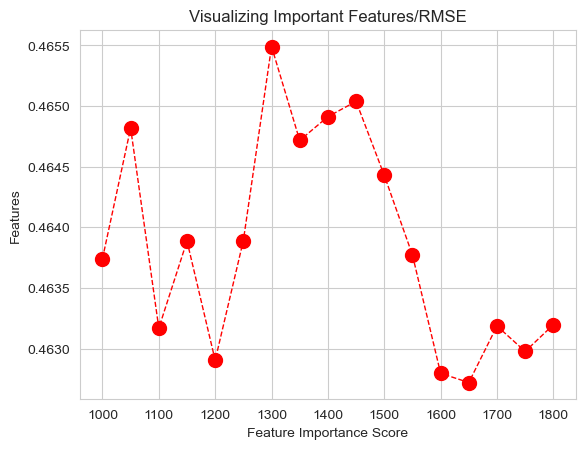

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
1,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.0,0.100000,0.033333,0.000000,0.033333,0.571429,1.000000,0.066667,0.000000
2,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.0,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
3,1980,2,4,2,9,0,0,0,0,7,...,0.000000,2.0,0.000000,0.010000,0.010000,0.033333,0.428571,0.428571,1.000000,1.000000
5,1971,1,3,2,9,2,0,0,0,5,...,0.000000,2.0,0.142857,0.033333,0.000000,0.033333,0.066667,0.428571,0.066667,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7814,1983,2,5,2,9,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.033333,0.033333,0.000000,0.000000,0.000000
7824,1971,2,4,2,10,0,3,0,0,4,...,0.428571,2.0,0.000000,0.142857,0.142857,0.142857,0.571429,2.000000,1.000000,0.571429
7828,1969,2,3,2,1,0,7,0,0,0,...,0.571429,2.0,0.100000,0.066667,0.000000,0.000000,0.066667,2.000000,0.000000,0.066667
7829,1964,2,4,2,10,0,7,0,0,0,...,0.714286,2.0,0.428571,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.285714


In [71]:
data1_1=data1[data1['是否吃豆腐']==1]
data1_2=data1[data1['是否吃豆腐']==2]
completing_values(data1_1,0,56,27,'豆腐平均每次食用量')

11
0.20155160403297237


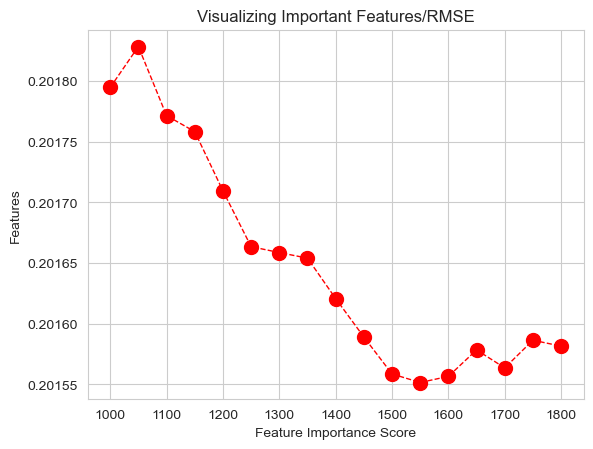

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.000000,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
1,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.000000,0.100000,0.033333,0.000000,0.033333,0.571429,1.000000,0.066667,0.000000
2,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.000000,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
3,1980,2,4,2,9,0,0,0,0,7,...,0.000000,2.000000,0.000000,0.010000,0.010000,0.033333,0.428571,0.428571,1.000000,1.000000
5,1971,1,3,2,9,2,0,0,0,5,...,0.000000,2.000000,0.142857,0.033333,0.000000,0.033333,0.066667,0.428571,0.066667,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7787,1977,2,4,2,4,0,7,0,0,0,...,0.000000,0.166667,0.033333,0.066667,0.000000,0.000000,0.000000,2.000000,0.033333,0.033333
7815,1977,1,5,2,6,0,7,0,0,0,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
7820,1968,2,2,2,10,0,7,0,0,0,...,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.100000,0.100000,0.000000,0.000000
7825,1953,2,2,2,2,0,7,0,0,0,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.033333,2.000000,0.000000,0.000000


In [73]:
data1 = pd.concat([data1_1, data1_2],axis=0,ignore_index=False)
completing_values(data1,0,57,26,'是否吃豆腐丝等')

9
0.33763514531852923


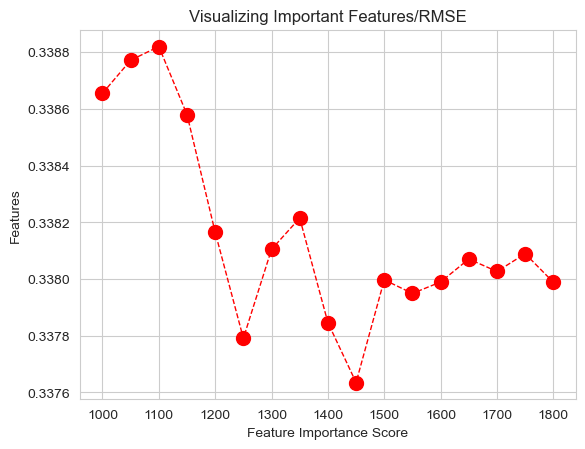

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.000000,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
1,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.000000,0.100000,0.033333,0.000000,0.033333,0.571429,1.000000,0.066667,0.000000
2,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.000000,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
3,1980,2,4,2,9,0,0,0,0,7,...,0.000000,2.000000,0.000000,0.010000,0.010000,0.033333,0.428571,0.428571,1.000000,1.000000
5,1971,1,3,2,9,2,0,0,0,5,...,0.000000,2.000000,0.142857,0.033333,0.000000,0.033333,0.066667,0.428571,0.066667,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7176,1942,2,1,2,10,0,7,0,0,0,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.142857,0.000000,0.033333
7245,1973,1,4,2,9,0,2,0,0,5,...,0.000000,0.428571,0.000000,0.100000,0.000000,0.571429,0.000000,0.571429,0.000000,0.000000
7548,1974,1,5,1,4,0,2,0,5,0,...,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.428571,0.428571,0.000000,0.000000
7655,1981,2,3,2,9,0,7,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000


In [74]:
data1_1=data1[data1['是否吃豆腐丝等']==1]
data1_2=data1[data1['是否吃豆腐丝等']==2]
completing_values(data1_1,0,58,27,'豆腐丝平均每次食用量')

9
0.17589031016978693


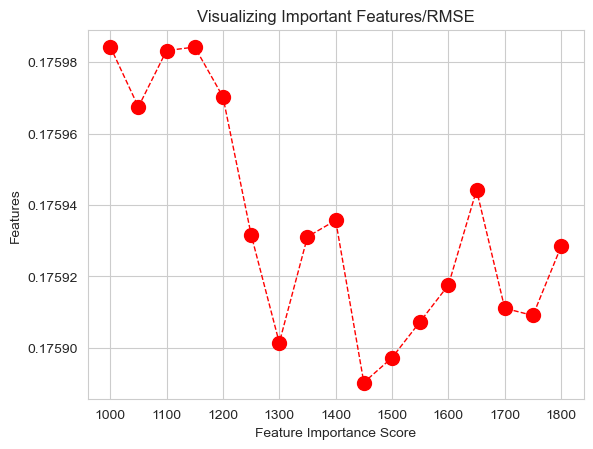

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.000000,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
1,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.000000,0.100000,0.033333,0.000000,0.033333,0.571429,1.000000,0.066667,0.000000
2,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.000000,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
3,1980,2,4,2,9,0,0,0,0,7,...,0.000000,2.000000,0.000000,0.010000,0.010000,0.033333,0.428571,0.428571,1.000000,1.000000
5,1971,1,3,2,9,2,0,0,0,5,...,0.000000,2.000000,0.142857,0.033333,0.000000,0.033333,0.066667,0.428571,0.066667,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7787,1977,2,4,2,4,0,7,0,0,0,...,0.000000,0.166667,0.033333,0.066667,0.000000,0.000000,0.000000,2.000000,0.033333,0.033333
7815,1977,1,5,2,6,0,7,0,0,0,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
7820,1968,2,2,2,10,0,7,0,0,0,...,0.000000,0.000000,0.000000,0.033333,0.000000,0.000000,0.100000,0.100000,0.000000,0.000000
7825,1953,2,2,2,2,0,7,0,0,0,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.033333,2.000000,0.000000,0.000000


In [75]:
data1 = pd.concat([data1_1, data1_2],axis=0,ignore_index=False)
completing_values(data1,0,59,26,'是否吃豆浆')

1
0.737621810689682


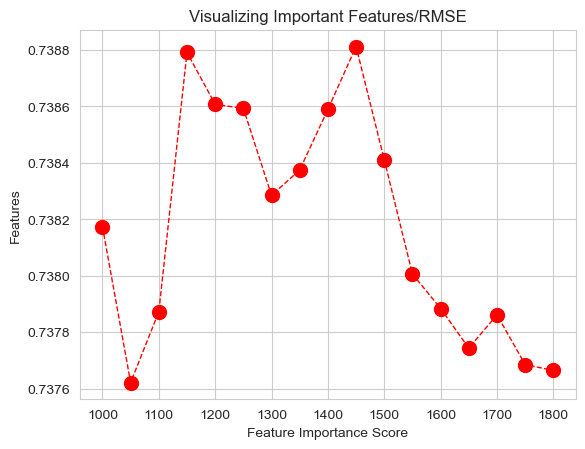

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
1,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.0,0.100000,0.033333,0.000000,0.033333,0.571429,1.000000,0.066667,0.000000
2,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.0,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
3,1980,2,4,2,9,0,0,0,0,7,...,0.000000,2.0,0.000000,0.010000,0.010000,0.033333,0.428571,0.428571,1.000000,1.000000
5,1971,1,3,2,9,2,0,0,0,5,...,0.000000,2.0,0.142857,0.033333,0.000000,0.033333,0.066667,0.428571,0.066667,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7055,1972,1,4,2,1,0,2,0,0,5,...,0.285714,2.0,0.714286,0.000000,0.000000,0.000000,0.000000,1.000000,0.142857,0.142857
7168,1950,2,2,2,10,7,0,0,0,0,...,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.033333,0.000000
7258,1945,2,3,5,11,0,7,0,0,0,...,0.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.033333,2.000000,0.285714,0.000000
7299,1976,2,3,2,10,0,4,0,0,3,...,0.285714,2.0,0.142857,0.066667,0.033333,0.033333,0.000000,1.000000,0.000000,0.000000


In [76]:
data1_1=data1[data1['是否吃豆浆']==1]
data1_2=data1[data1['是否吃豆浆']==2]
completing_values(data1_1,0,60,27,'豆浆平均每次食用量')

14
0.19079019683290963


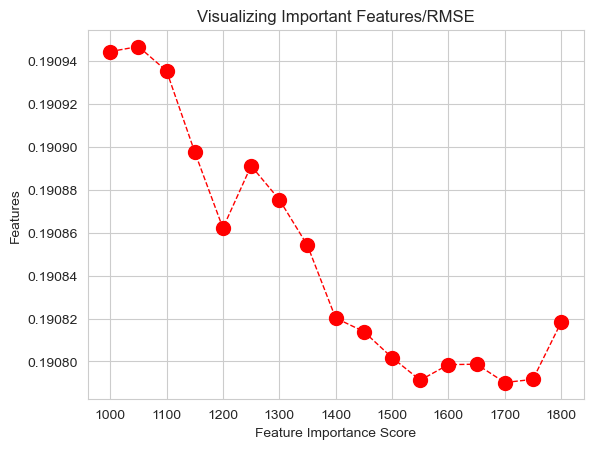

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.000000,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
1,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.000000,0.100000,0.033333,0.000000,0.033333,0.571429,1.000000,0.066667,0.000000
2,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.000000,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
3,1980,2,4,2,9,0,0,0,0,7,...,0.000000,2.000000,0.000000,0.010000,0.010000,0.033333,0.428571,0.428571,1.000000,1.000000
5,1971,1,3,2,9,2,0,0,0,5,...,0.000000,2.000000,0.142857,0.033333,0.000000,0.033333,0.066667,0.428571,0.066667,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7650,1957,2,3,2,10,0,7,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.066667,0.066667
7787,1977,2,4,2,4,0,7,0,0,0,...,0.000000,0.166667,0.033333,0.066667,0.000000,0.000000,0.000000,2.000000,0.033333,0.033333
7815,1977,1,5,2,6,0,7,0,0,0,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
7825,1953,2,2,2,2,0,7,0,0,0,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.033333,2.000000,0.000000,0.000000


In [77]:
data1 = pd.concat([data1_1, data1_2],axis=0,ignore_index=False)
completing_values(data1,0,61,26,'是否吃干豆')

4
0.33668198246541187


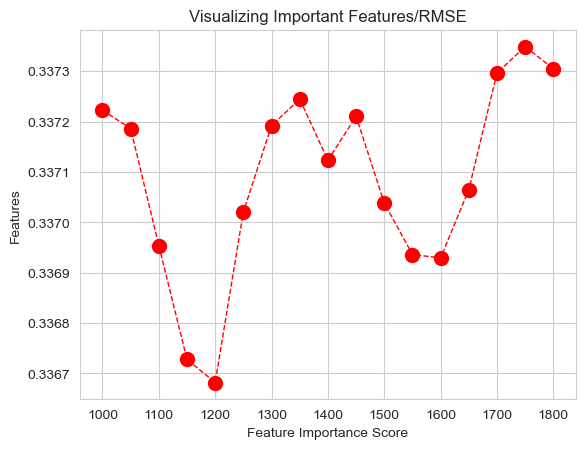

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.000000,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
1,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.000000,0.100000,0.033333,0.000000,0.033333,0.571429,1.000000,0.066667,0.000000
2,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.000000,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
6,1950,1,5,2,11,0,7,0,0,0,...,0.142857,1.000000,0.714286,0.714286,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
7,1971,1,5,2,9,4,3,0,0,0,...,0.020000,1.000000,0.142857,1.000000,1.000000,1.000000,1.000000,1.000000,0.142857,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5618,1973,1,3,2,12,3,4,0,0,0,...,0.066667,2.000000,0.000000,0.100000,0.000000,0.000000,0.285714,0.571429,0.428571,0.285714
5988,1961,1,3,2,12,0,0,0,0,7,...,0.142857,2.000000,0.000000,0.066667,0.000000,0.100000,0.000000,0.285714,0.000000,0.000000
7505,1973,1,3,2,12,0,0,0,0,7,...,0.100000,0.714286,0.142857,0.000000,0.000000,0.000000,0.100000,1.000000,0.000000,1.000000
7583,1978,2,2,2,10,7,0,0,0,0,...,0.142857,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.428571


In [78]:
data1_1=data1[data1['是否吃干豆']==1]
data1_2=data1[data1['是否吃干豆']==2]
completing_values(data1_1,0,62,27,'干豆平均每次食用量')

14
0.032251495570784446


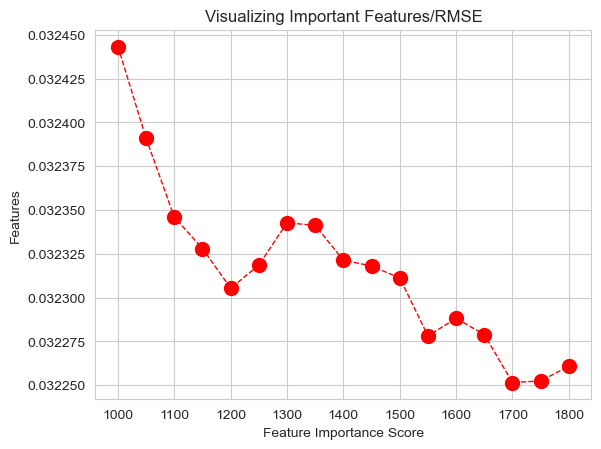

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.000000,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
1,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.000000,0.100000,0.033333,0.000000,0.033333,0.571429,1.000000,0.066667,0.000000
2,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.000000,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
6,1950,1,5,2,11,0,7,0,0,0,...,0.142857,1.000000,0.714286,0.714286,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
7,1971,1,5,2,9,4,3,0,0,0,...,0.020000,1.000000,0.142857,1.000000,1.000000,1.000000,1.000000,1.000000,0.142857,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7650,1957,2,3,2,10,0,7,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.066667,0.066667
7787,1977,2,4,2,4,0,7,0,0,0,...,0.000000,0.166667,0.033333,0.066667,0.000000,0.000000,0.000000,2.000000,0.033333,0.033333
7815,1977,1,5,2,6,0,7,0,0,0,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
7825,1953,2,2,2,2,0,7,0,0,0,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.033333,2.000000,0.000000,0.000000


In [80]:
data1 = pd.concat([data1_1, data1_2],axis=0,ignore_index=False)
completing_values(data1,0,63,26,'是否吃新鲜蔬菜')

11
0.6825622862977614


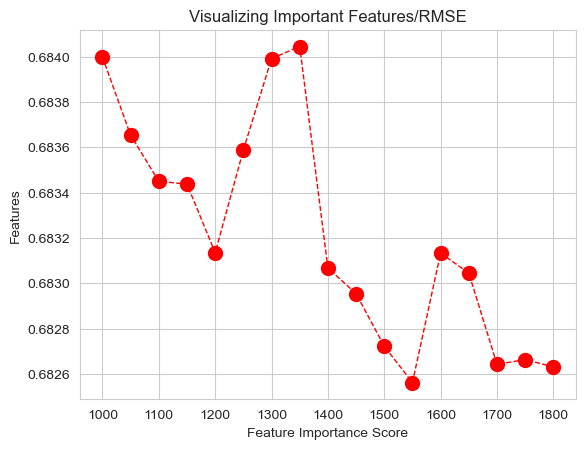

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.000000,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
1,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.000000,0.100000,0.033333,0.000000,0.033333,0.571429,1.000000,0.066667,0.000000
2,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.000000,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
6,1950,1,5,2,11,0,7,0,0,0,...,0.142857,1.000000,0.714286,0.714286,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
7,1971,1,5,2,9,4,3,0,0,0,...,0.020000,1.000000,0.142857,1.000000,1.000000,1.000000,1.000000,1.000000,0.142857,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7425,1950,2,2,2,11,0,7,0,0,0,...,0.000000,1.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.428571,0.066667,0.000000
7628,1965,2,4,1,11,0,7,0,0,0,...,0.000000,3.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.285714,0.000000,0.000000
7787,1977,2,4,2,4,0,7,0,0,0,...,0.000000,0.166667,0.033333,0.066667,0.000000,0.000000,0.000000,2.000000,0.033333,0.033333
7815,1977,1,5,2,6,0,7,0,0,0,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000


In [82]:
data1_1=data1[data1['是否吃新鲜蔬菜']==1]
data1_2=data1[data1['是否吃新鲜蔬菜']==2]
completing_values(data1_1,0,64,27,'新鲜蔬菜平均每次食用量')

4
0.16450328210237275


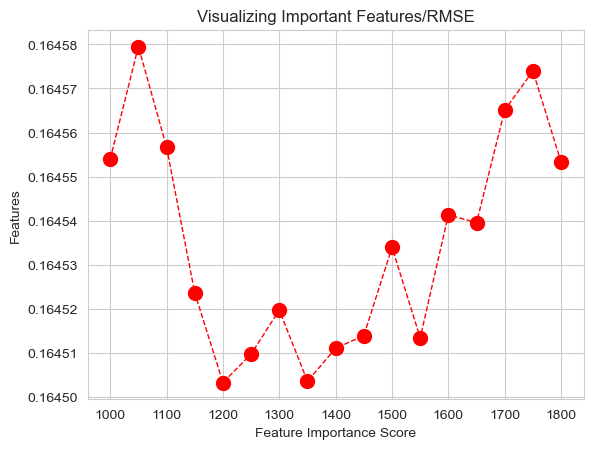

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
1,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.0,0.100000,0.033333,0.000000,0.033333,0.571429,1.000000,0.066667,0.000000
2,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.0,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
6,1950,1,5,2,11,0,7,0,0,0,...,0.142857,1.0,0.714286,0.714286,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
7,1971,1,5,2,9,4,3,0,0,0,...,0.020000,1.0,0.142857,1.000000,1.000000,1.000000,1.000000,1.000000,0.142857,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,1969,2,2,2,10,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.066667,0.100000,0.000000,0.000000,0.000000,0.000000
3977,1964,1,2,2,1,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.033333
4225,1951,2,4,2,10,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
7650,1957,2,3,2,10,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.066667,0.066667


In [83]:
data1 = pd.concat([data1_1, data1_2],axis=0,ignore_index=False)
completing_values(data1,0,65,26,'是否吃海草类')

16
0.32988198862346924


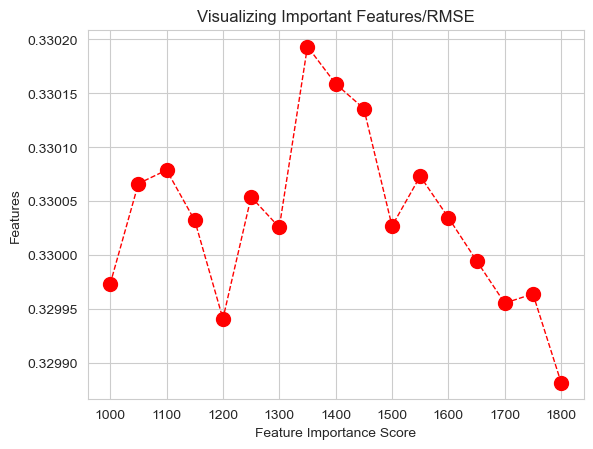

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
1,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.0,0.100000,0.033333,0.000000,0.033333,0.571429,1.000000,0.066667,0.000000
2,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.0,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
6,1950,1,5,2,11,0,7,0,0,0,...,0.142857,1.0,0.714286,0.714286,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
7,1971,1,5,2,9,4,3,0,0,0,...,0.020000,1.0,0.142857,1.000000,1.000000,1.000000,1.000000,1.000000,0.142857,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6235,1979,1,4,2,4,0,7,0,0,0,...,0.000000,0.0,0.066667,0.000000,0.000000,0.000000,0.714286,1.000000,0.000000,1.000000
7705,1939,1,3,2,2,0,7,0,0,0,...,0.000000,0.0,0.142857,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
4234,1963,2,4,4,4,0,7,0,0,0,...,0.000000,0.0,0.033333,0.066667,0.000000,0.000000,0.000000,0.066667,0.066667,0.066667
7621,1952,1,3,2,2,0,0,0,0,7,...,0.000000,0.0,0.033333,0.285714,0.000000,0.000000,0.285714,0.000000,0.000000,0.000000


In [84]:
data1_1=data1[data1['是否吃海草类']==1]
data1_2=data1[data1['是否吃海草类']==2]
completing_values(data1_1,0,66,27,'海草类平均每次食用量')

16
0.1942955320880957


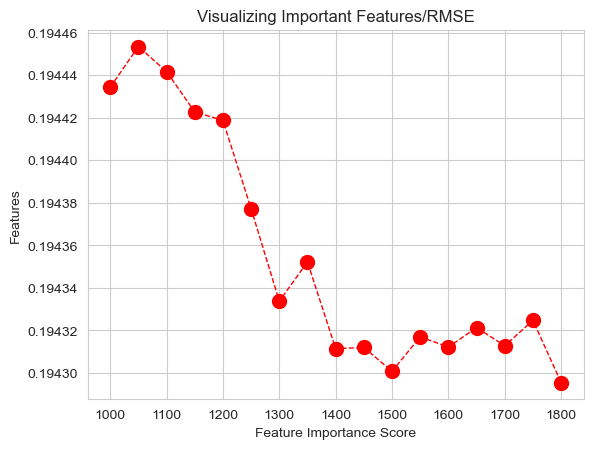

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
1,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.0,0.100000,0.033333,0.000000,0.033333,0.571429,1.000000,0.066667,0.000000
2,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.0,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
6,1950,1,5,2,11,0,7,0,0,0,...,0.142857,1.0,0.714286,0.714286,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
7,1971,1,5,2,9,4,3,0,0,0,...,0.020000,1.0,0.142857,1.000000,1.000000,1.000000,1.000000,1.000000,0.142857,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,1969,2,2,2,10,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.066667,0.100000,0.000000,0.000000,0.000000,0.000000
3977,1964,1,2,2,1,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.033333
4225,1951,2,4,2,10,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
7650,1957,2,3,2,10,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.066667,0.066667


In [86]:
data1 = pd.concat([data1_1, data1_2],axis=0,ignore_index=False)
completing_values(data1,0,67,26,'是否吃咸菜')

0
0.28525732577965857


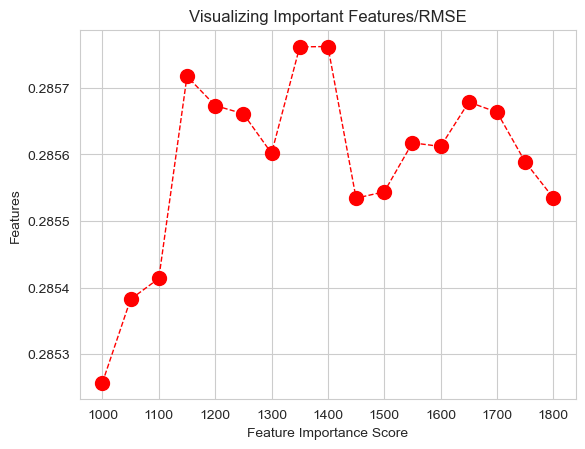

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.0,0.285714,0.428571
1,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.0,0.100000,0.033333,0.000000,0.033333,0.571429,1.0,0.066667,0.000000
2,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.0,0.285714,0.066667,0.066667,0.066667,0.066667,2.0,0.285714,0.285714
6,1950,1,5,2,11,0,7,0,0,0,...,0.142857,1.0,0.714286,0.714286,0.000000,0.000000,1.000000,1.0,0.000000,0.000000
7,1971,1,5,2,9,4,3,0,0,0,...,0.020000,1.0,0.142857,1.000000,1.000000,1.000000,1.000000,1.0,0.142857,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7820,1968,2,2,2,10,0,7,0,0,0,...,0.000000,0.0,0.000000,0.033333,0.000000,0.000000,0.100000,0.1,0.000000,0.000000
7612,1951,2,2,2,10,0,7,0,0,0,...,0.000000,0.0,0.000000,0.033333,0.033333,0.033333,0.000000,2.0,0.033333,0.000000
4387,1956,2,2,2,10,0,7,0,0,0,...,0.000000,0.0,0.000000,0.100000,0.000000,0.000000,0.000000,3.0,0.000000,0.000000
5408,1950,1,2,2,1,0,0,0,0,7,...,0.000000,0.0,0.000000,0.033333,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [87]:
data1_1=data1[data1['是否吃咸菜']==1]
data1_2=data1[data1['是否吃咸菜']==2]
completing_values(data1_1,0,68,27,'咸菜平均每次食用量')

16
0.17649229160162133


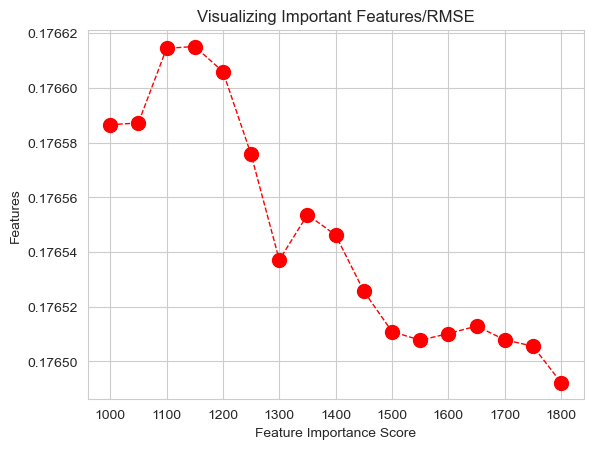

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
1,1974,2,4,2,12,0,4,0,0,3,...,0.285714,1.0,0.100000,0.033333,0.000000,0.033333,0.571429,1.000000,0.066667,0.000000
2,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.0,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
6,1950,1,5,2,11,0,7,0,0,0,...,0.142857,1.0,0.714286,0.714286,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
7,1971,1,5,2,9,4,3,0,0,0,...,0.020000,1.0,0.142857,1.000000,1.000000,1.000000,1.000000,1.000000,0.142857,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,1969,2,2,2,10,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.066667,0.100000,0.000000,0.000000,0.000000,0.000000
3977,1964,1,2,2,1,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.033333
4225,1951,2,4,2,10,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
7650,1957,2,3,2,10,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.066667,0.066667


In [88]:
data1 = pd.concat([data1_1, data1_2],axis=0,ignore_index=False)
completing_values(data1,0,69,26,'是否吃泡菜')

15
0.2410293072977853


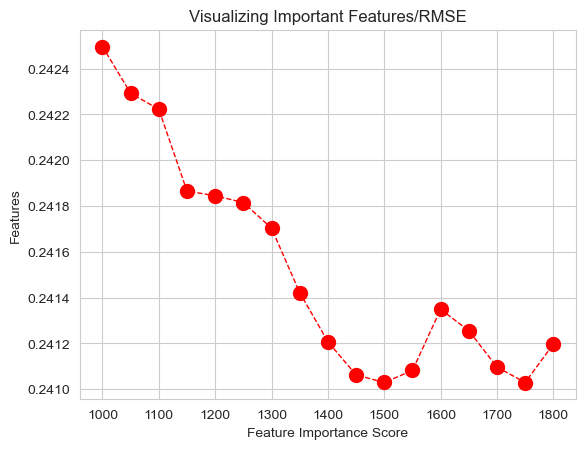

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
2,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.0,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
7,1971,1,5,2,9,4,3,0,0,0,...,0.020000,1.0,0.142857,1.000000,1.000000,1.000000,1.000000,1.000000,0.142857,0.285714
9,1968,1,4,2,9,0,2,0,5,0,...,0.033333,2.0,0.033333,0.033333,0.033333,0.033333,0.033333,0.571429,0.000000,0.000000
10,1955,1,4,2,4,0,3,0,0,4,...,0.142857,1.0,0.285714,0.142857,0.142857,0.142857,0.285714,1.000000,0.142857,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6881,1981,2,3,2,10,0,0,0,0,7,...,0.000000,3.0,0.000000,0.000000,0.142857,0.000000,0.000000,2.000000,1.000000,0.000000
7445,1960,2,3,2,10,0,7,0,0,0,...,0.000000,1.0,0.000000,0.000000,1.000000,0.000000,0.285714,1.000000,0.000000,0.000000
7618,1975,1,5,2,9,7,0,0,0,0,...,0.000000,2.0,0.000000,0.000000,0.428571,0.000000,0.000000,1.000000,0.000000,0.000000
7693,1985,2,3,2,9,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.033333,0.033333,0.000000,0.066667,0.000000,0.000000


In [89]:
data1_1=data1[data1['是否吃泡菜']==1]
data1_2=data1[data1['是否吃泡菜']==2]
completing_values(data1_1,0,70,27,'泡菜平均每次食用量')

10
0.20362883486743685


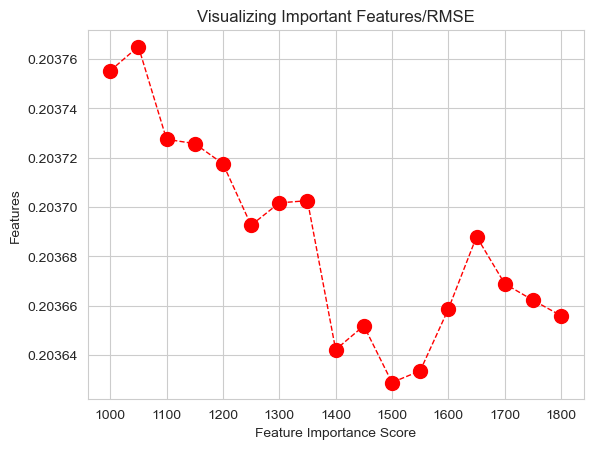

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
2,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.0,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
7,1971,1,5,2,9,4,3,0,0,0,...,0.020000,1.0,0.142857,1.000000,1.000000,1.000000,1.000000,1.000000,0.142857,0.285714
9,1968,1,4,2,9,0,2,0,5,0,...,0.033333,2.0,0.033333,0.033333,0.033333,0.033333,0.033333,0.571429,0.000000,0.000000
10,1955,1,4,2,4,0,3,0,0,4,...,0.142857,1.0,0.285714,0.142857,0.142857,0.142857,0.285714,1.000000,0.142857,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7786,1953,2,2,2,10,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
3977,1964,1,2,2,1,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.033333
4225,1951,2,4,2,10,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
7650,1957,2,3,2,10,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.066667,0.066667


In [90]:
data1 = pd.concat([data1_1, data1_2],axis=0,ignore_index=False)
completing_values(data1,0,71,26,'是否吃酸菜')

15
0.25997601615960203


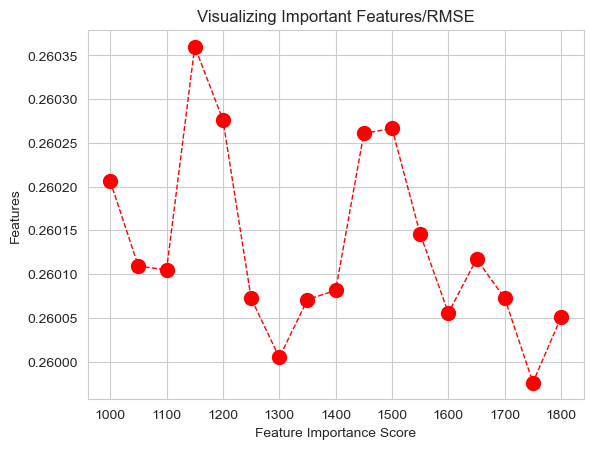

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
2,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.0,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
7,1971,1,5,2,9,4,3,0,0,0,...,0.020000,1.0,0.142857,1.000000,1.000000,1.000000,1.000000,1.000000,0.142857,0.285714
9,1968,1,4,2,9,0,2,0,5,0,...,0.033333,2.0,0.033333,0.033333,0.033333,0.033333,0.033333,0.571429,0.000000,0.000000
10,1955,1,4,2,4,0,3,0,0,4,...,0.142857,1.0,0.285714,0.142857,0.142857,0.142857,0.285714,1.000000,0.142857,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7173,1970,2,3,2,9,0,0,0,0,7,...,0.000000,2.0,0.000000,0.000000,0.000000,0.033333,0.066667,1.000000,0.000000,1.000000
5275,1964,2,2,2,10,0,0,0,0,7,...,0.000000,2.0,0.000000,0.000000,0.000000,0.100000,0.142857,0.714286,0.428571,0.033333
4163,1973,2,5,2,10,0,7,0,0,0,...,0.000000,2.0,0.000000,0.000000,0.000000,0.066667,0.100000,0.100000,0.000000,0.000000
1106,1980,2,5,2,12,0,6,0,0,1,...,0.000000,0.0,0.000000,0.000000,0.000000,0.033333,0.142857,0.428571,0.000000,0.000000


In [91]:
data1_1=data1[data1['是否吃酸菜']==1]
data1_2=data1[data1['是否吃酸菜']==2]
completing_values(data1_1,0,72,27,'酸菜平均每次食用量')

11
0.17696803636703393


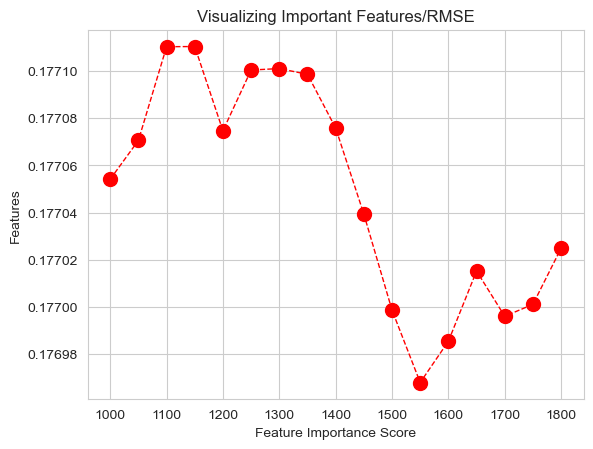

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
2,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.0,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
7,1971,1,5,2,9,4,3,0,0,0,...,0.020000,1.0,0.142857,1.000000,1.000000,1.000000,1.000000,1.000000,0.142857,0.285714
9,1968,1,4,2,9,0,2,0,5,0,...,0.033333,2.0,0.033333,0.033333,0.033333,0.033333,0.033333,0.571429,0.000000,0.000000
10,1955,1,4,2,4,0,3,0,0,4,...,0.142857,1.0,0.285714,0.142857,0.142857,0.142857,0.285714,1.000000,0.142857,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7786,1953,2,2,2,10,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
3977,1964,1,2,2,1,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.033333
4225,1951,2,4,2,10,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
7650,1957,2,3,2,10,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.066667,0.066667


In [92]:
data1 = pd.concat([data1_1, data1_2],axis=0,ignore_index=False)
completing_values(data1,0,73,26,'是否吃糕点')

3
0.3801674185007561


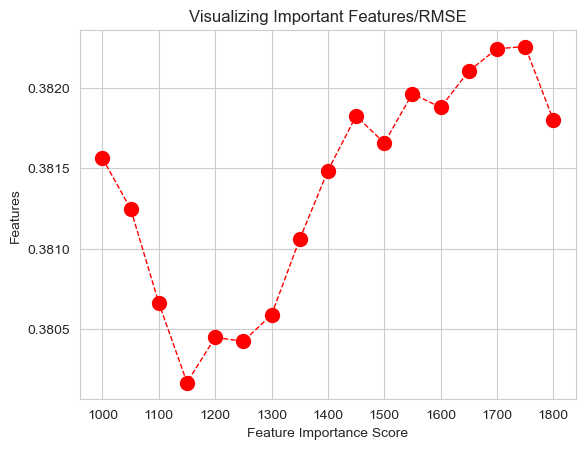

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
2,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.0,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
7,1971,1,5,2,9,4,3,0,0,0,...,0.020000,1.0,0.142857,1.000000,1.000000,1.000000,1.000000,1.000000,0.142857,0.285714
9,1968,1,4,2,9,0,2,0,5,0,...,0.033333,2.0,0.033333,0.033333,0.033333,0.033333,0.033333,0.571429,0.000000,0.000000
10,1955,1,4,2,4,0,3,0,0,4,...,0.142857,1.0,0.285714,0.142857,0.142857,0.142857,0.285714,1.000000,0.142857,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4241,1971,2,2,4,1,0,7,0,0,0,...,0.428571,0.0,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.100000,0.000000
2511,1943,1,2,2,11,2,5,0,0,0,...,0.033333,0.0,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.000000,6.000000
3283,1970,2,4,2,12,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.142857,1.000000,0.000000,0.000000
4181,1967,1,4,2,9,0,1,0,0,6,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.066667,0.428571


In [93]:
data1_1=data1[data1['是否吃糕点']==1]
data1_2=data1[data1['是否吃糕点']==2]
completing_values(data1_1,0,74,27,'糕点平均每次食用量')

7
0.052845767571991206


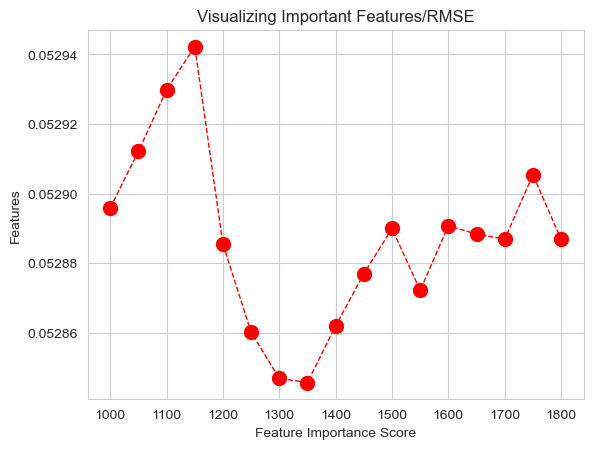

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
2,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.0,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
7,1971,1,5,2,9,4,3,0,0,0,...,0.020000,1.0,0.142857,1.000000,1.000000,1.000000,1.000000,1.000000,0.142857,0.285714
9,1968,1,4,2,9,0,2,0,5,0,...,0.033333,2.0,0.033333,0.033333,0.033333,0.033333,0.033333,0.571429,0.000000,0.000000
10,1955,1,4,2,4,0,3,0,0,4,...,0.142857,1.0,0.285714,0.142857,0.142857,0.142857,0.285714,1.000000,0.142857,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7786,1953,2,2,2,10,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
3977,1964,1,2,2,1,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.033333
4225,1951,2,4,2,10,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
7650,1957,2,3,2,10,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.066667,0.066667


In [94]:
data1 = pd.concat([data1_1, data1_2],axis=0,ignore_index=False)
completing_values(data1,0,75,26,'是否吃水果')

10
3.026814002175406


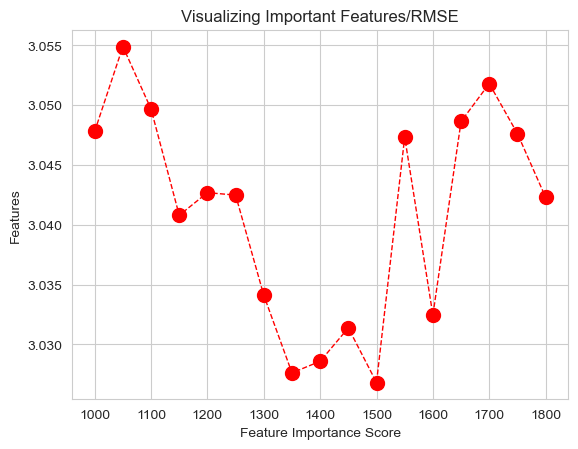

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
2,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.0,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
7,1971,1,5,2,9,4,3,0,0,0,...,0.020000,1.0,0.142857,1.000000,1.000000,1.000000,1.000000,1.000000,0.142857,0.285714
9,1968,1,4,2,9,0,2,0,5,0,...,0.033333,2.0,0.033333,0.033333,0.033333,0.033333,0.033333,0.571429,0.000000,0.000000
10,1955,1,4,2,4,0,3,0,0,4,...,0.142857,1.0,0.285714,0.142857,0.142857,0.142857,0.285714,1.000000,0.142857,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7784,1980,2,4,2,9,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.033333,0.033333
7589,1954,2,3,2,10,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
3977,1964,1,2,2,1,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.033333
4225,1951,2,4,2,10,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000


In [95]:
data1_1=data1[data1['是否吃水果']==1]
data1_2=data1[data1['是否吃水果']==2]
completing_values(data1_1,0,76,27,'水果平均每次食用量')

11
0.19456443123173414


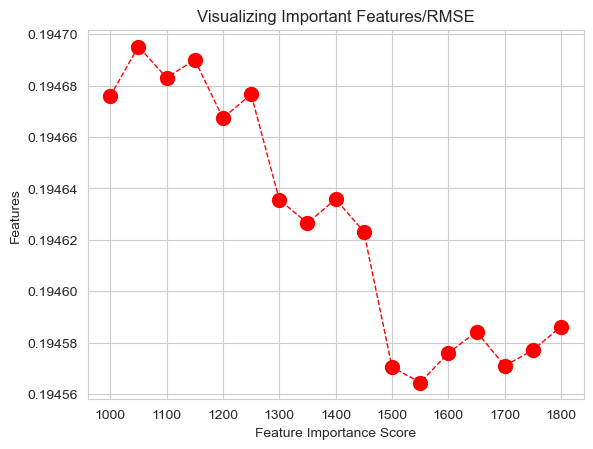

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
2,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.0,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
7,1971,1,5,2,9,4,3,0,0,0,...,0.020000,1.0,0.142857,1.000000,1.000000,1.000000,1.000000,1.000000,0.142857,0.285714
9,1968,1,4,2,9,0,2,0,5,0,...,0.033333,2.0,0.033333,0.033333,0.033333,0.033333,0.033333,0.571429,0.000000,0.000000
10,1955,1,4,2,4,0,3,0,0,4,...,0.142857,1.0,0.285714,0.142857,0.142857,0.142857,0.285714,1.000000,0.142857,0.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7827,1983,2,4,2,9,0,7,0,0,0,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6967,1965,1,3,2,12,7,0,0,0,0,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4232,1987,2,3,2,9,0,7,0,0,0,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7786,1953,2,2,2,10,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000


In [96]:
data1 = pd.concat([data1_1, data1_2],axis=0,ignore_index=False)
completing_values(data1,0,77,26,'是否吃果汁饮料')

10
0.241377241023072


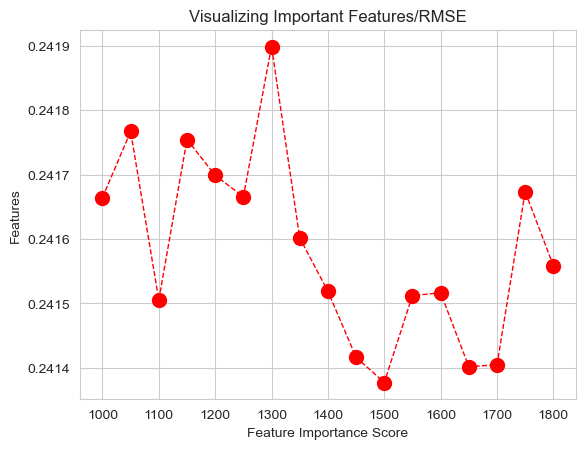

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.000000,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
2,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.000000,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
7,1971,1,5,2,9,4,3,0,0,0,...,0.020000,1.000000,0.142857,1.000000,1.000000,1.000000,1.000000,1.000000,0.142857,0.285714
10,1955,1,4,2,4,0,3,0,0,4,...,0.142857,1.000000,0.285714,0.142857,0.142857,0.142857,0.285714,1.000000,0.142857,0.285714
16,1977,1,5,2,5,0,1,0,0,6,...,0.066667,1.000000,0.142857,0.033333,0.066667,0.033333,0.033333,0.285714,0.428571,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6800,1973,1,5,2,9,7,0,0,0,0,...,0.000000,2.000000,0.285714,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714,0.428571
6569,1945,1,4,2,11,0,7,0,0,0,...,0.000000,2.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
3871,1964,2,3,2,10,0,7,0,0,0,...,0.285714,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.714286,0.000000
4192,1981,1,4,2,9,0,7,0,0,0,...,0.166667,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333


In [97]:
data1_1=data1[data1['是否吃果汁饮料']==1]
data1_2=data1[data1['是否吃果汁饮料']==2]
completing_values(data1_1,0,78,27,'果汁饮料平均每次食用量')

12
0.1969068503075277


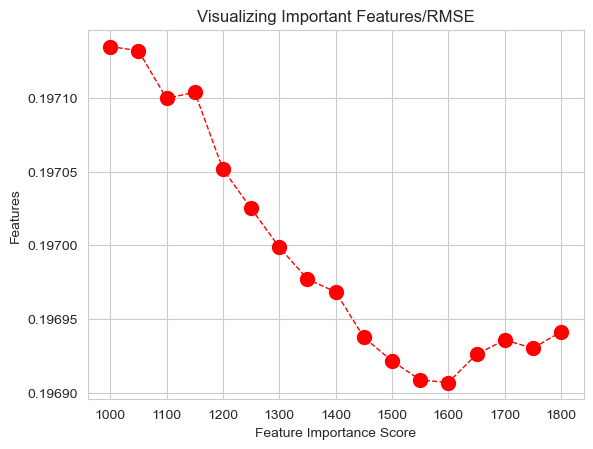

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
2,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.0,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
7,1971,1,5,2,9,4,3,0,0,0,...,0.020000,1.0,0.142857,1.000000,1.000000,1.000000,1.000000,1.000000,0.142857,0.285714
10,1955,1,4,2,4,0,3,0,0,4,...,0.142857,1.0,0.285714,0.142857,0.142857,0.142857,0.285714,1.000000,0.142857,0.285714
16,1977,1,5,2,5,0,1,0,0,6,...,0.066667,1.0,0.142857,0.033333,0.066667,0.033333,0.033333,0.285714,0.428571,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7827,1983,2,4,2,9,0,7,0,0,0,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6967,1965,1,3,2,12,7,0,0,0,0,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4232,1987,2,3,2,9,0,7,0,0,0,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7786,1953,2,2,2,10,0,7,0,0,0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000


In [98]:
data1 = pd.concat([data1_1, data1_2],axis=0,ignore_index=False)
completing_values(data1,0,79,26,'是否吃其他饮料')

14
0.3246894918476714


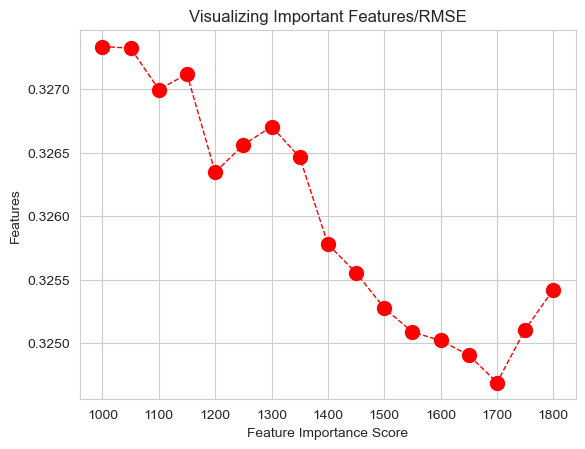

,出生年,性别,文化程度,婚姻状况,职业,不吃早餐,在家吃早餐,早餐带餐到单位,单位食堂早餐,在餐馆或街头吃早餐,...,食用干豆的频率,食用新鲜蔬菜的频率,食用海草的频率,食用咸菜的频率,食用泡菜的频率,食用酸菜的频率,食用糕点的频率,食用水果的频率,食用果汁饮料的频率,食用其他饮料的频率
0,1962,1,4,2,12,0,7,0,0,0,...,0.033333,2.0,0.142857,0.142857,0.142857,0.142857,0.428571,1.000000,0.285714,0.428571
2,1978,1,5,2,1,0,1,0,6,0,...,2.000000,2.0,0.285714,0.066667,0.066667,0.066667,0.066667,2.000000,0.285714,0.285714
7,1971,1,5,2,9,4,3,0,0,0,...,0.020000,1.0,0.142857,1.000000,1.000000,1.000000,1.000000,1.000000,0.142857,0.285714
10,1955,1,4,2,4,0,3,0,0,4,...,0.142857,1.0,0.285714,0.142857,0.142857,0.142857,0.285714,1.000000,0.142857,0.285714
16,1977,1,5,2,5,0,1,0,0,6,...,0.066667,1.0,0.142857,0.033333,0.066667,0.033333,0.033333,0.285714,0.428571,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7698,1972,2,3,2,10,0,0,0,0,7,...,0.142857,2.0,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667
7712,1975,1,5,2,5,7,0,0,0,0,...,0.285714,2.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
4085,1965,1,3,2,1,2,0,0,0,5,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285714
7530,1963,1,5,2,6,0,7,0,0,0,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


In [99]:
data1_1=data1[data1['是否吃其他饮料']==1]
data1_2=data1[data1['是否吃其他饮料']==2]
completing_values(data1_1,0,80,27,'其他饮料平均每次食用量')

In [110]:
data3 = pd.concat([data1_1, data1_2],axis=0,ignore_index=False)

data3.其他饮料平均每次食用量.isnull().sum()

3961

In [111]:
data.iloc[:,27:81] = data.iloc[:,27:81].fillna(0)
data.to_excel('output8.xlsx',index=False)

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (2625611635.py, line 3)